# Prediction of Precipitation in London using Machine Learning

## Author: Mathew Thomas

## Introduction

Weather data encompasses a vast array of information therefore analyzing it is crucial for various industries & fields. This includes meteorology, climate science, agriculture, energy, transportation, and disaster preparedness. Using the concatenated dataset we created in the "Reworked datasets" notebook, we will explore the various weather attributes. In this notebook, we will first perform an EDA with a focus on precipitation before diving in on how we can use time series analysis and ML models to predict precipitation.

## Table of Contents

[1. EDA](#1.-EDA) <br>
- [Exploring the dataset](#Exploring-the-dataset) 
- [Dealing with null values](#Dealing-with-null-values)
- [Removing odd data](#Removing-odd-data)
- [Visuals](#Visuals)

[2. Time Series Analysis](#2.-Time-Series-Analysis) <br>
- [Forecasting](#Forecasting)
- [Baseline Forecast and evaluation](#Baseline-Forecast-and-evaluation)
- [SARIMAX](#SARIMAX)

[3. Regressor Models](#3.-Regressor-Models) <br>
- [LGBM](#LGBM)
- [XGBoost](#XGBoost)
    
[4. Conclusion](#4.-Conclusion) <br>

### Loading various libraries & dataset

In [368]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [369]:
lw_df = pd.read_csv("C:\\Users\\mitth\\Documents\\Brainstation\\Final_Project\\London_Weather_EDA\\lw_df.csv")

### Data dictionary:
- `DATE`: recorded date of measurement
- `CC`: Cloud Cover, measurement in oktas 
- `HU`: Humidity, measurement in %
- `QQ`: Global Radiation, irradiance measurement in Watt per square meter (W/m2)
- `TX`: Temperature Maximum, maximum temperature recorded in degrees Celsius (°C)
- `TG`: Temperature Mean, mean temperature in degrees Celsius (°C)
- `TN`: Temperature Minimum, minimum temperature recorded in degrees Celsius (°C)
- `RR`: Precipitation, precipitation measurement in millimeters (mm)
- `PP`: Pressure, pressure measurement in Pascals (hPa)
- `SD`: Snow Depth, depth measurement in centimeters (cm)
- `SS`: Sunshine, measurement in hours (hrs)

## 1. EDA

### Exploring the dataset

In [370]:
lw_df.head()

DATE   CC    HU    QQ   TX   TN   TG   RR      PP   SD   SS
0  1979-01-01  2.0  83.0  52.0  2.3 -7.5 -4.1  0.4  1019.0  9.0  7.0
1  1979-01-02  6.0  76.0  27.0  1.6 -7.5 -2.6  0.0  1025.3  8.0  1.7
2  1979-01-03  5.0  86.0  13.0  1.3 -7.2 -2.8  0.0  1020.5  4.0  0.0
3  1979-01-04  8.0  68.0  13.0 -0.3 -6.5 -2.6  0.0  1008.4  2.0  0.0
4  1979-01-05  6.0  73.0  29.0  5.6 -1.4 -0.8  0.0  1022.5  1.0  2.0

In [371]:
lw_df.shape

(16071, 11)

In [372]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16071 non-null  object 
 1   CC      16053 non-null  float64
 2   HU      16014 non-null  float64
 3   QQ      16046 non-null  float64
 4   TX      16071 non-null  float64
 5   TN      16071 non-null  float64
 6   TG      16071 non-null  float64
 7   RR      16071 non-null  float64
 8   PP      16071 non-null  float64
 9   SD      14996 non-null  float64
 10  SS      16071 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.3+ MB


In [373]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC        18
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

#### Convert datatype for `DATE`

In [374]:
lw_df['DATE'] = pd.to_datetime(lw_df['DATE'], format='%Y-%m-%d', errors='coerce')

In [375]:
lw_df.head()

DATE   CC    HU    QQ   TX   TN   TG   RR      PP   SD   SS
0 1979-01-01  2.0  83.0  52.0  2.3 -7.5 -4.1  0.4  1019.0  9.0  7.0
1 1979-01-02  6.0  76.0  27.0  1.6 -7.5 -2.6  0.0  1025.3  8.0  1.7
2 1979-01-03  5.0  86.0  13.0  1.3 -7.2 -2.8  0.0  1020.5  4.0  0.0
3 1979-01-04  8.0  68.0  13.0 -0.3 -6.5 -2.6  0.0  1008.4  2.0  0.0
4 1979-01-05  6.0  73.0  29.0  5.6 -1.4 -0.8  0.0  1022.5  1.0  2.0

In [376]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16053 non-null  float64       
 2   HU      16014 non-null  float64       
 3   QQ      16046 non-null  float64       
 4   TX      16071 non-null  float64       
 5   TN      16071 non-null  float64       
 6   TG      16071 non-null  float64       
 7   RR      16071 non-null  float64       
 8   PP      16071 non-null  float64       
 9   SD      14996 non-null  float64       
 10  SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.3 MB


### Dealing with null values

In [377]:
columns_to_check = ['CC', 'HU', 'QQ']

In [378]:
# Drop rows with null values in the specified columns
lw_df.dropna(subset=columns_to_check, inplace=True)

In [379]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU         0
QQ         0
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1052
SS         0
dtype: int64

In [380]:
# Replace null values in the 'SD' column with 0
lw_df['SD'].fillna(0, inplace=True)

In [381]:
# Check for missing values
lw_df.isna().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

#### Check box plots

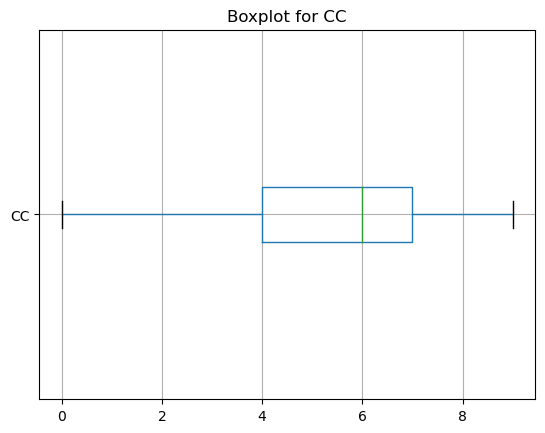

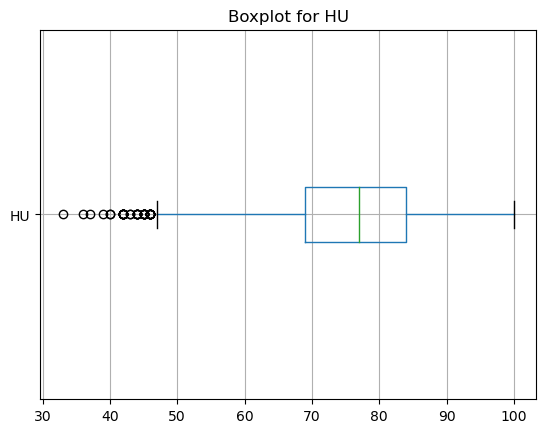

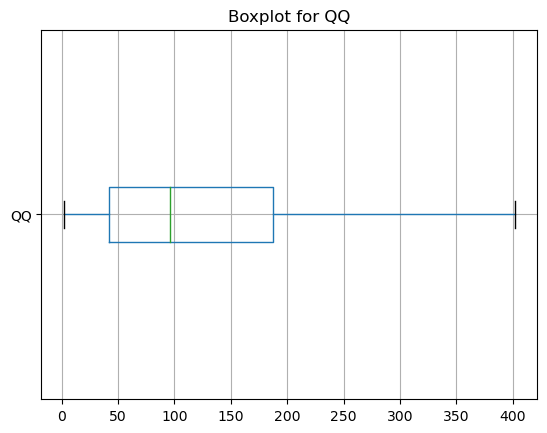

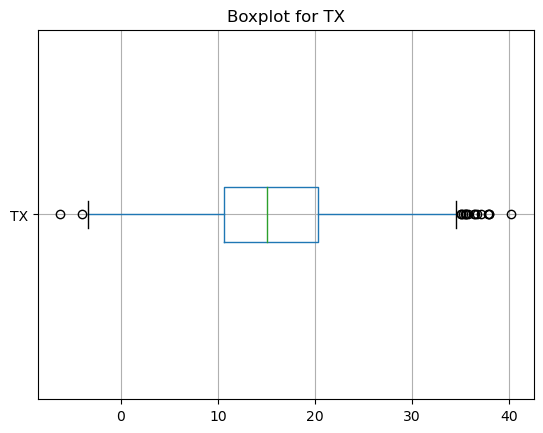

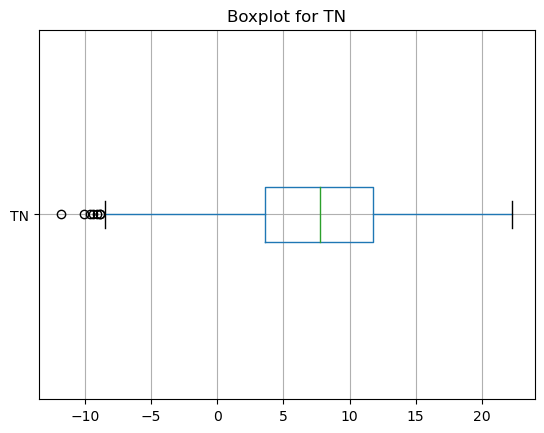

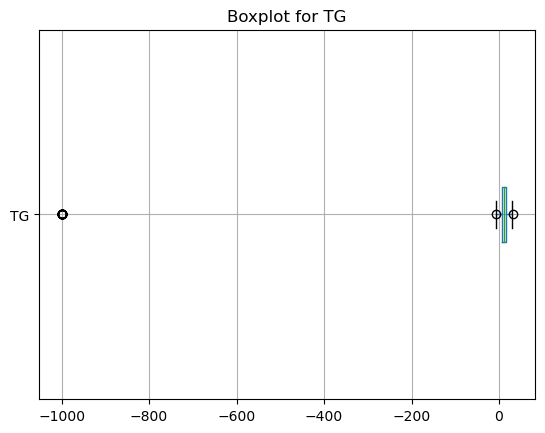

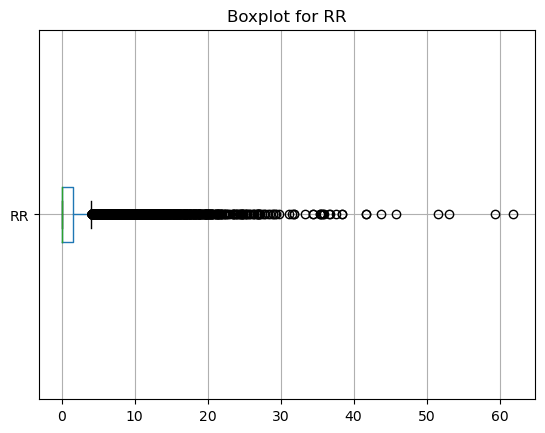

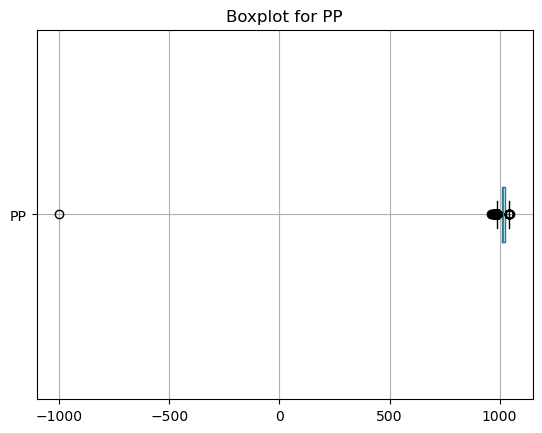

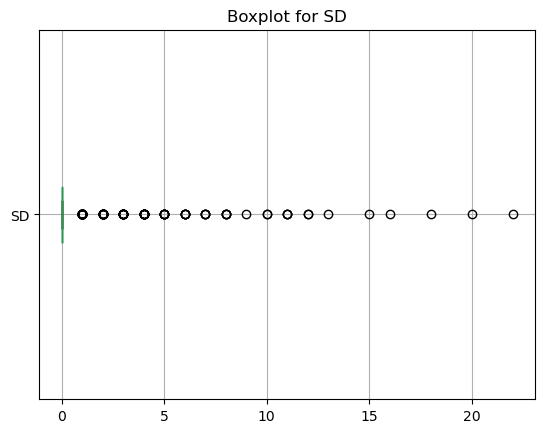

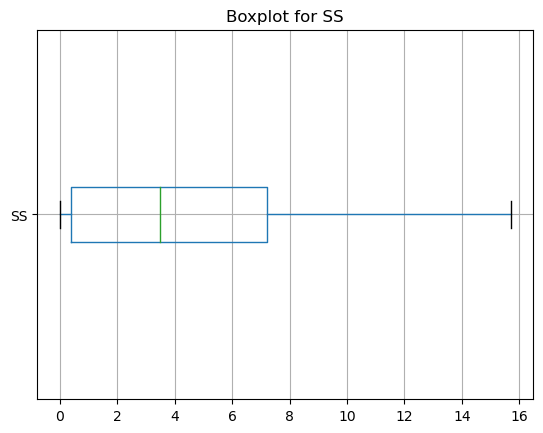

In [382]:
# Creating a boxplot to check for anomalies 
# Exclude 'DATE' column
columns_to_plot = [column for column in lw_df.columns if column != 'DATE']

for column in columns_to_plot:
    plt.figure()
    plt.title(f"Boxplot for {column}")
    lw_df.boxplot(column=column, vert=False)
    plt.show()

#### Need to look into following for outliers:
- TG mean temperature, close to -1000 values
- PP pressure, close to -1000 values

In [383]:
#Finding out how many values are below an extreme value
num_values_less_than_minus_200 = (lw_df['TG'] < -200).sum()

print(f"Number of values in 'TG' column less than -200: {num_values_less_than_minus_200}")

Number of values in 'TG' column less than -200: 28


In [384]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['TG'] < -200, 'TG']

# Display the values
print("Values in 'TG' column less than -200:")
print(values_less_than_minus_200)

Values in 'TG' column less than -200:
9751    -999.9
9784    -999.9
9860    -999.9
9870    -999.9
9895    -999.9
9937    -999.9
9985    -999.9
10173   -999.9
10196   -999.9
10199   -999.9
10276   -999.9
10310   -999.9
10316   -999.9
10368   -999.9
10498   -999.9
10502   -999.9
10525   -999.9
10595   -999.9
10662   -999.9
10702   -999.9
10739   -999.9
10751   -999.9
10810   -999.9
10814   -999.9
10903   -999.9
11015   -999.9
11060   -999.9
11082   -999.9
Name: TG, dtype: float64


From our supplementary document, we know these represent null values. We should delete them.

#### Now Pressure

In [385]:
# Assuming lw_df is your DataFrame
num_values_less_than_minus_200 = (lw_df['PP'] < -100).sum()

print(f"Number of values in 'PP' column less than -100: {num_values_less_than_minus_200}")

Number of values in 'PP' column less than -100: 1


In [386]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['PP'] < -100, 'PP']

# Display the values
print("Values in 'TG' column less than -100:")
print(values_less_than_minus_200)

Values in 'TG' column less than -100:
362   -999.9
Name: PP, dtype: float64


#### Delete all -999.9 values for TG and PP 

In [387]:
# Assuming 'lw_df' is your DataFrame
lw_df = lw_df[(lw_df['PP'] != -999.9) & (lw_df['TG'] != -999.9)]

In [388]:
# Assuming 'lw_df' is your DataFrame
count_tg_minus_9999 = (lw_df['TG'] == -999.9).sum()
count_pp_minus_9999 = (lw_df['PP'] == -999.9).sum()

print("Count of -999.9 in 'TG' column:", count_tg_minus_9999)
print("Count of -999.9 in 'PP' column:", count_pp_minus_9999)

Count of -999.9 in 'TG' column: 0
Count of -999.9 in 'PP' column: 0


### Removing odd data

#### When TX is less than TN

In [389]:
mask = lw_df['TX'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TX < TN:", count)

Number of values where TX < TN: 251


In [390]:
# Create a boolean mask to filter rows where TX < TN
mask = lw_df['TX'] < lw_df['TN']

# Use the mask to filter rows in the DataFrame
rows_where_tx_lt_tn = lw_df[mask]

# Display the examples of these rows
print(rows_where_tx_lt_tn)


            DATE   CC    HU     QQ   TX   TN    TG    RR      PP   SD   SS
15    1979-01-16  8.0  93.0   15.0  2.6  4.1   5.0   3.9  1031.0  0.0  0.0
43    1979-02-13  8.0  97.0   24.0  0.2  0.3   4.2   9.1   981.3  0.0  0.0
44    1979-02-14  6.0  86.0   54.0 -0.8 -0.7  -0.2   0.0   993.8  1.0  2.4
71    1979-03-13  8.0  92.0   42.0  3.8  4.4   4.6  20.3  1008.0  0.0  0.0
474   1980-04-19  4.0  59.0  217.0  9.1  9.4  12.1   0.0  1014.0  0.0  8.5
...          ...  ...   ...    ...  ...  ...   ...   ...     ...  ...  ...
15691 2021-12-17  8.0  82.0   14.0  9.1  9.3   9.4   0.0  1040.4  0.0  0.1
15692 2021-12-18  8.0  92.0   12.0  6.5  7.1   8.1   0.0  1039.1  0.0  0.0
15708 2022-01-03  6.0  84.0   25.0  7.9  8.7   9.8   0.4  1007.9  0.0  0.0
15709 2022-01-04  6.0  86.0   22.0  6.6  7.4   7.7   4.0  1001.5  0.0  0.0
15728 2022-01-23  8.0  79.0   22.0  4.6  4.8   5.5   0.0  1035.3  0.0  0.0

[251 rows x 11 columns]


In [391]:
# Create a boolean mask to filter rows where TX < TN
mask = lw_df['TX'] >= lw_df['TN']

# Use the mask to filter rows in the DataFrame
lw_df = lw_df[mask]

In [392]:
mask = lw_df['TX'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TX < TN:", count)

Number of values where TX < TN: 0


#### When TX is less than TG

In [393]:
mask = lw_df['TX'] < lw_df['TG']

# Count the number of True values in the mask (i.e., number of rows where TX < TG)
count = mask.sum()

print("Number of values where TX < TG:", count)

Number of values where TX < TG: 839


In [394]:
# Create a boolean mask to filter rows where TX < TG
mask = lw_df['TX'] < lw_df['TG']

# Use the mask to filter rows in the DataFrame
rows_where_tx_lt_tg = lw_df[mask]

# Display the examples of these rows
print(rows_where_tx_lt_tg)


            DATE   CC    HU     QQ    TX    TN    TG    RR      PP   SD   SS
7     1979-01-08  8.0  95.0   15.0   5.8   5.3   6.9   0.8  1018.7  0.0  0.1
16    1979-01-17  8.0  93.0   15.0   1.9   1.6   2.1   2.5  1022.2  0.0  0.0
31    1979-02-01  8.0  96.0   19.0   4.0   1.2   5.2  10.1   994.9  0.0  0.0
61    1979-03-03  8.0  88.0   40.0  10.5   9.4  11.0   5.3  1018.5  0.0  0.1
70    1979-03-12  5.0  71.0  115.0   4.9   3.7   7.2   1.1  1008.8  0.0  4.8
...          ...  ...   ...    ...   ...   ...   ...   ...     ...  ...  ...
15941 2022-08-24  5.0  66.0  212.0  21.8  20.0  24.6  24.6  1016.2  0.0  8.0
15960 2022-09-12  7.0  74.0  142.0  18.8  14.8  20.5   0.0  1011.9  0.0  4.4
16037 2022-11-28  4.0  92.0   35.0   7.3   4.4   8.2   0.4  1009.5  0.0  2.6
16042 2022-12-03  8.0  77.0   13.0   6.1   4.7   6.2   0.2  1020.6  0.0  0.0
16064 2022-12-25  8.0  89.0   16.0   8.2   6.8   9.3   1.6  1007.8  0.0  0.3

[839 rows x 11 columns]


In [395]:
# Create a boolean mask to filter rows where TX < TG
mask = lw_df['TX'] >= lw_df['TG']

# Use the mask to filter rows in the DataFrame
lw_df = lw_df[mask]

In [396]:
mask = lw_df['TX'] < lw_df['TG']

# Count the number of True values in the mask (i.e., number of rows where TX < TG)
count = mask.sum()

print("Number of values where TX < TG:", count)

Number of values where TX < TG: 0


#### When TG is less than TN

In [397]:
mask = lw_df['TG'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TG < TN:", count)

Number of values where TG < TN: 0


In [398]:
# Create a boolean mask to filter rows where TG < TN
mask = lw_df['TG'] < lw_df['TN']

# Use the mask to filter rows in the DataFrame
rows_where_tg_lt_tn = lw_df[mask]

# Display the examples of these rows
print(rows_where_tg_lt_tn)

Empty DataFrame
Columns: [DATE, CC, HU, QQ, TX, TN, TG, RR, PP, SD, SS]
Index: []


In [399]:
# Create a boolean mask to filter rows where TG < TN
mask = lw_df['TG'] >= lw_df['TN']

# Use the mask to filter rows in the DataFrame
lw_df = lw_df[mask]

In [400]:
mask = lw_df['TG'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TG < TN:", count)

Number of values where TG < TN: 0


In [401]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14852 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    14852 non-null  datetime64[ns]
 1   CC      14852 non-null  float64       
 2   HU      14852 non-null  float64       
 3   QQ      14852 non-null  float64       
 4   TX      14852 non-null  float64       
 5   TN      14852 non-null  float64       
 6   TG      14852 non-null  float64       
 7   RR      14852 non-null  float64       
 8   PP      14852 non-null  float64       
 9   SD      14852 non-null  float64       
 10  SS      14852 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.4 MB


### Visuals

#### Features

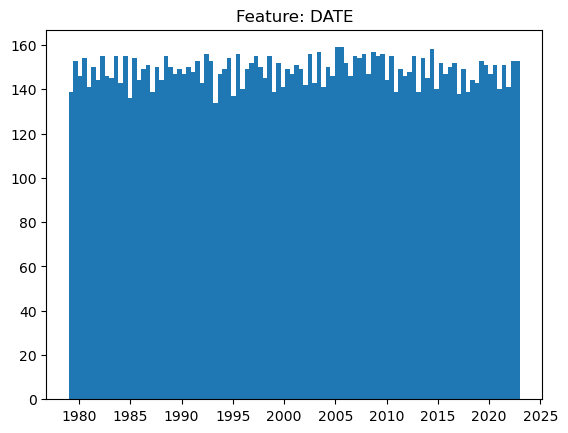

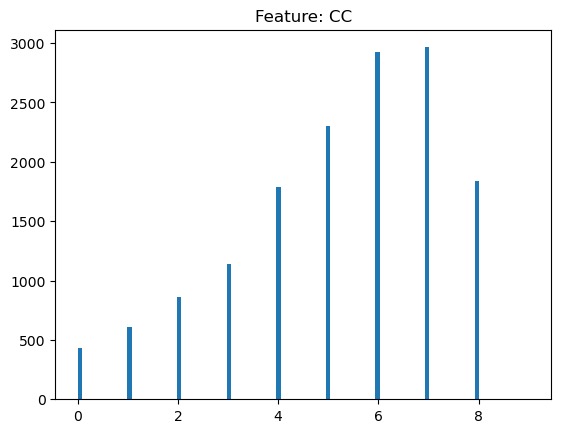

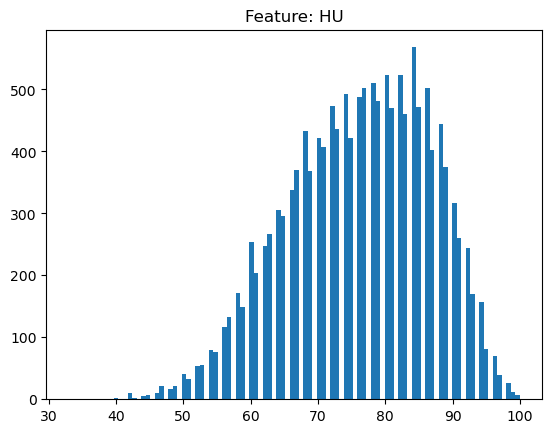

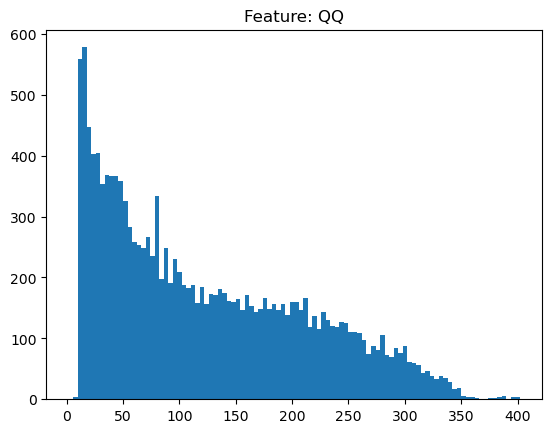

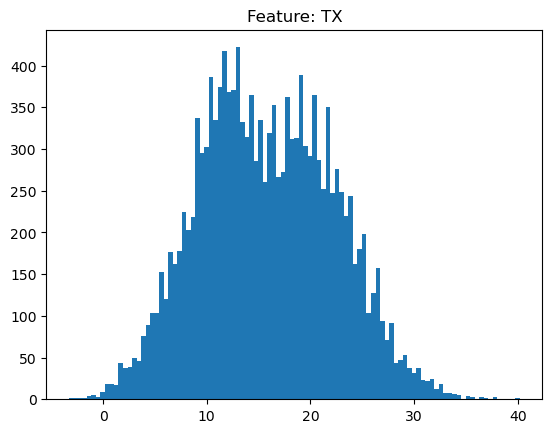

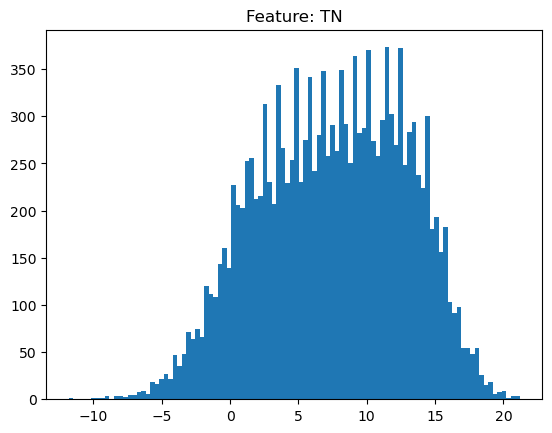

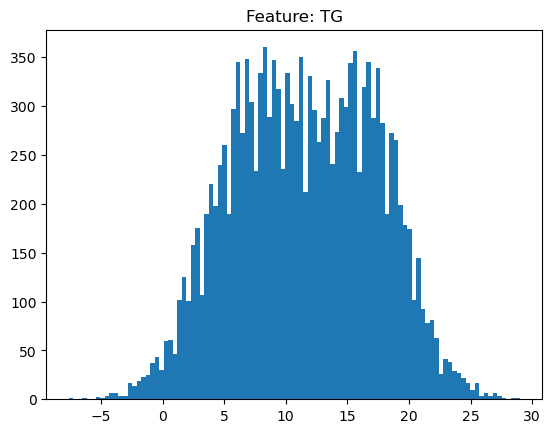

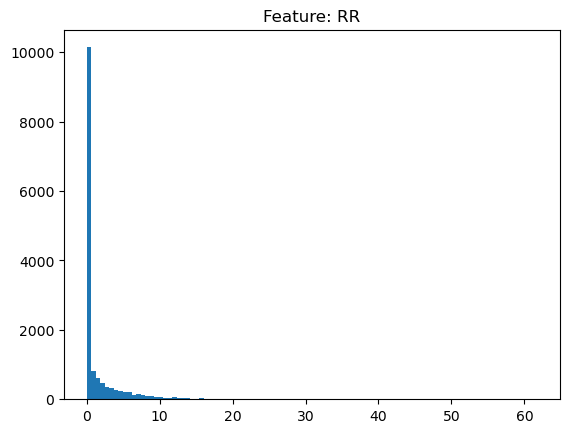

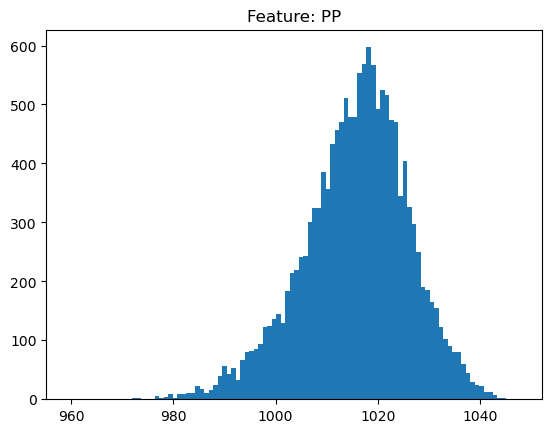

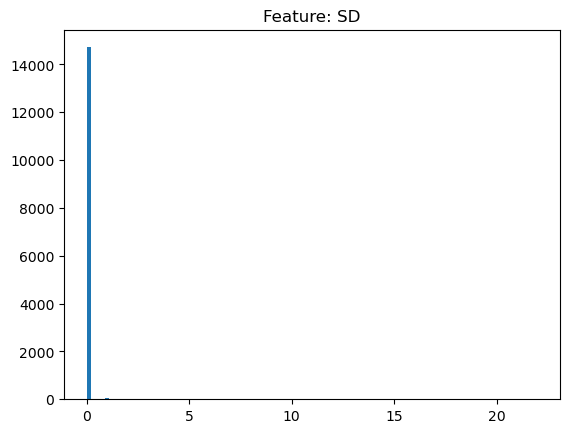

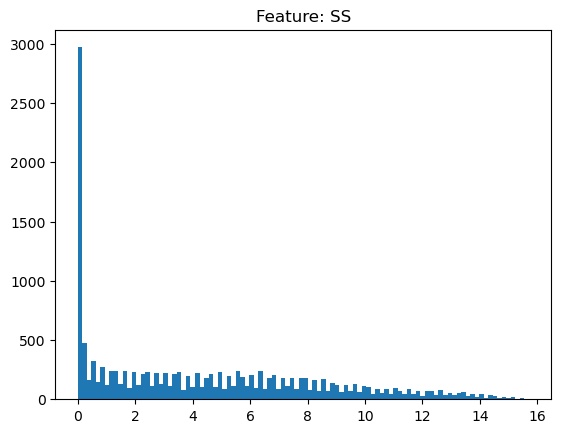

In [402]:
for column in lw_df.columns:
    plt.figure()
    plt.title(f"Feature: {column}")
    plt.hist(lw_df[column], bins=100)
    plt.show()

#### Pearson correlation

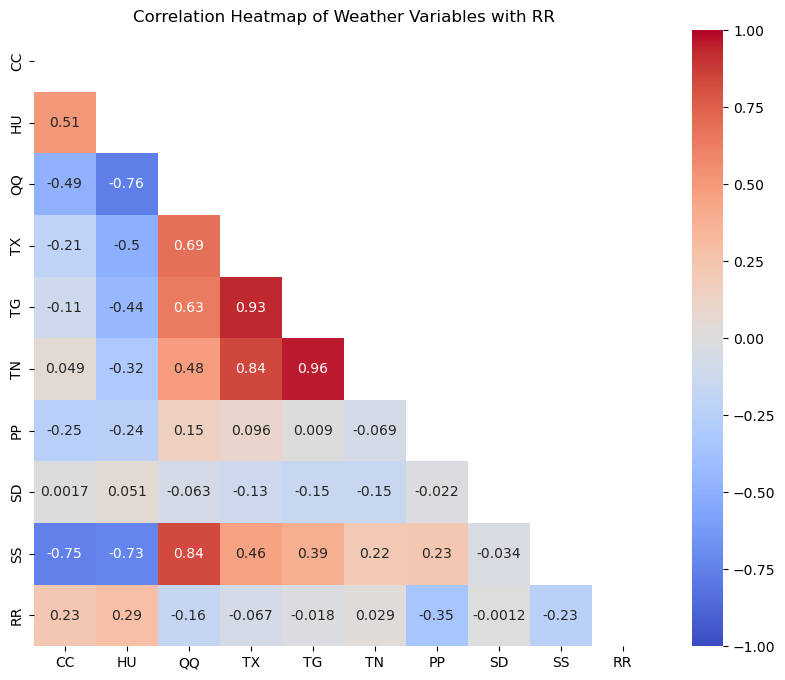

In [403]:
# Selecting weather variables for correlation analysis
weather_variables = ['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']

# Adding 'RR' as the dependent feature
weather_variables.append('RR')

# Calculating correlation matrix
correlation_matrix = lw_df[weather_variables].corr()

# Mask for the upper triangle
mask = ~np.tri(correlation_matrix.shape[0], k=-1, dtype=bool)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of Weather Variables with RR')
plt.show()

Here we can see our strongest positive correlation is between `TG` and `TN`. Our strongest negative correlation is with `HU` and `QQ`. 

#### Scatter plot of each feature with respect to precipiation (RR)

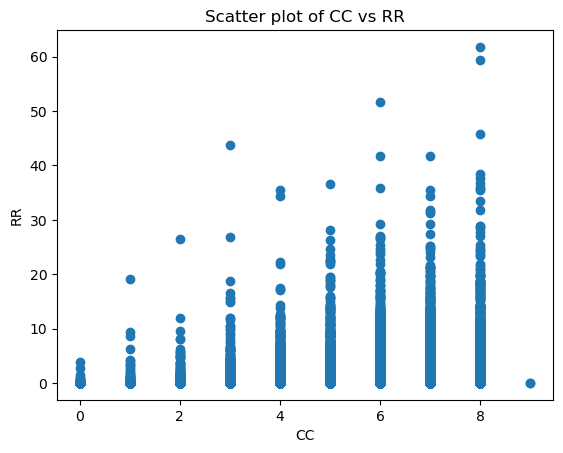

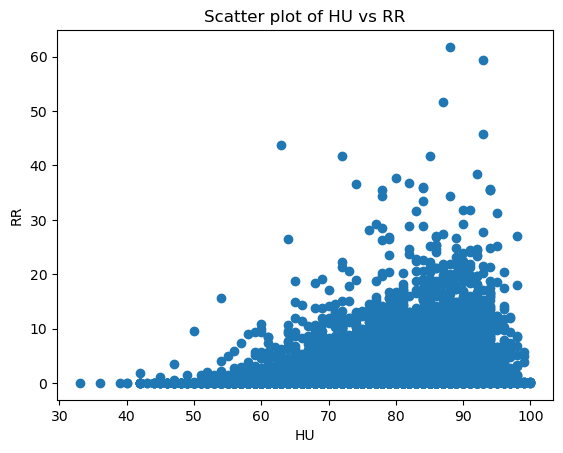

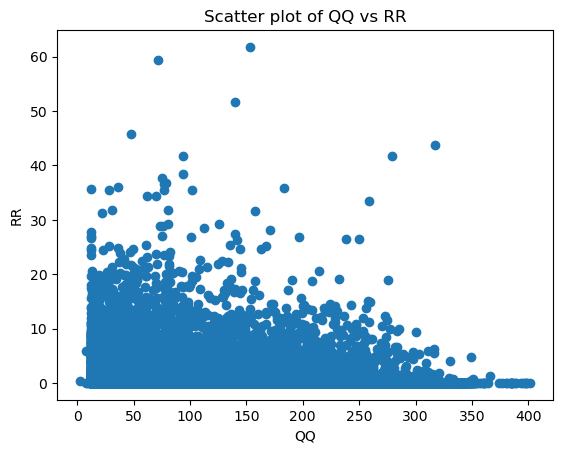

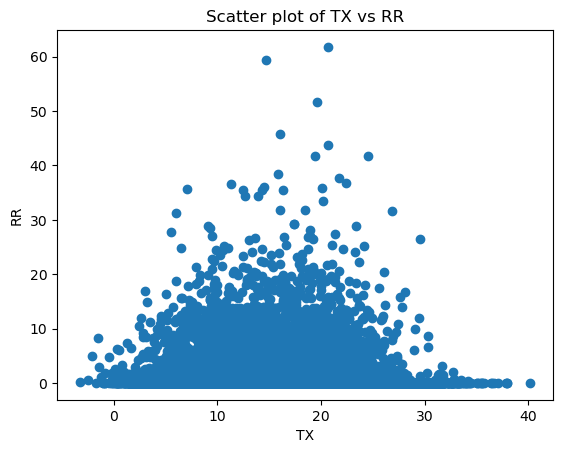

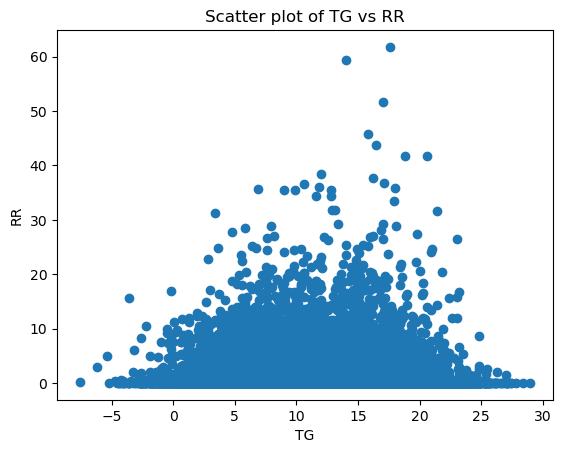

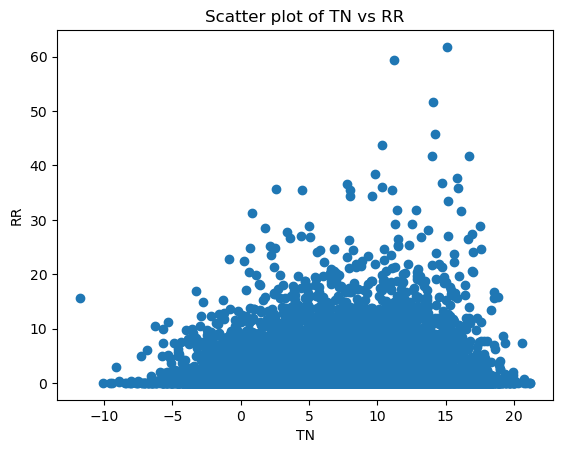

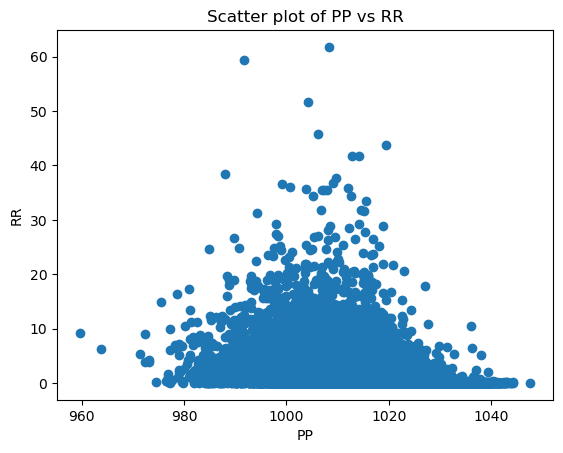

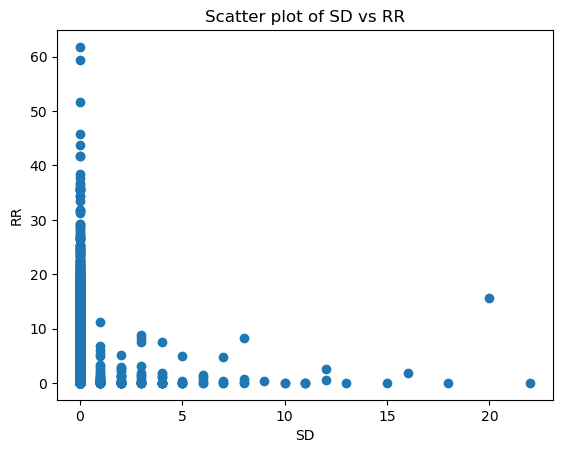

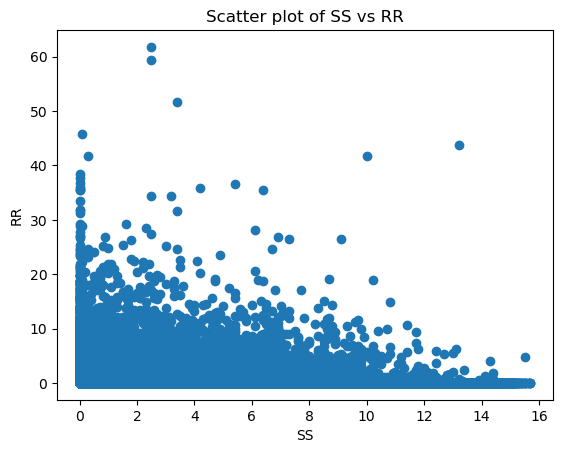

In [404]:
for feature in ['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']:
    plt.scatter(lw_df[feature], lw_df['RR'])
    plt.title(f'Scatter plot of {feature} vs RR')
    plt.xlabel(feature)
    plt.ylabel('RR')
    plt.show()

## 2. Time Series Analysis

In this seciton we will try and see if we can forecast our precipitation for a given period of time. 

In [405]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [406]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[14852 rows x 11 columns]

Let's add some more features by extracting from the `DATE` and then make it our index.

In [407]:
lw_df['YEAR'] = lw_df['DATE'].dt.year
lw_df['MONTH'] = lw_df['DATE'].dt.month
lw_df['DAY'] = lw_df['DATE'].dt.day
    #Adding dayofmonth column in train data
 #   data['dayofmonth'] = data['datetime'].dt.dayofmonth
    #Adding dayofweek column in train data
lw_df['DAYOFWEEK'] = lw_df['DATE'].dt.dayofweek
    #Adding dayofyear column in train data
lw_df['DAYOFYEAR']= lw_df['DATE'].dt.dayofyear
# Data transformation
lw_df['sin_dayofyear'] = np.pi * np.sin(lw_df['DAYOFYEAR']) / 183
lw_df['cos_dayofyear'] = np.pi * np.cos(lw_df['DAYOFYEAR']) / 183

In [408]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS  \
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0   
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7   
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0   
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0   
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0   
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...   
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5   
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0   
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5   
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1   
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0   

       YEAR  MONTH  DAY  DAYOFWEEK  DAYOFYEAR  sin_dayofyear  cos_dayofyear  
0      1979      1    1          0          1       0.014446       0.009275  
1      1979      1    2          1          2       0.015610      -0.007144  
2      1979      1    3          2          3       0.002423      -0.016995  
3      1979      1    4          3          4      -0.012992      -0.011221  
4      1979      1    5          4          5      -0.016462       0.004870  
...     ...    ...  ...        ...        ...            ...            ...  
16066  2022     12   27          1        361       0.004796      -0.016484  
16067  2022     12   28          2        362      -0.011279      -0.012942  
16068  2022     12   29          3        363      -0.016984       0.002498  
16069  2022     12   30          4        364      -0.007074       0.015642  
16070  2022     12   31          5        365       0.009340       0.014404  

[14852 rows x 18 columns]

In [409]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS  \
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0   
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7   
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0   
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0   
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0   
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...   
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5   
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0   
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5   
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1   
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0   

       YEAR  MONTH  DAY  DAYOFWEEK  DAYOFYEAR  sin_dayofyear  cos_dayofyear  
0      1979      1    1          0          1       0.014446       0.009275  
1      1979      1    2          1          2       0.015610      -0.007144  
2      1979      1    3          2          3       0.002423      -0.016995  
3      1979      1    4          3          4      -0.012992      -0.011221  
4      1979      1    5          4          5      -0.016462       0.004870  
...     ...    ...  ...        ...        ...            ...            ...  
16066  2022     12   27          1        361       0.004796      -0.016484  
16067  2022     12   28          2        362      -0.011279      -0.012942  
16068  2022     12   29          3        363      -0.016984       0.002498  
16069  2022     12   30          4        364      -0.007074       0.015642  
16070  2022     12   31          5        365       0.009340       0.014404  

[14852 rows x 18 columns]

In [410]:
cleaned_lw_df = lw_df.copy()

In [411]:
cleaned_lw_df.to_csv('C:\\Users\\mitth\\Documents\\Brainstation\\Final_Project\\London_Weather_EDA\\clean_data.csv', index=False)

In [361]:
lw_df.set_index("DATE", inplace=True)

In [362]:
RR_time_df = lw_df[['RR']]

In [363]:
RR_time_df.head()

RR
DATE           
1979-01-01  0.4
1979-01-02  0.0
1979-01-03  0.0
1979-01-04  0.0
1979-01-05  0.0

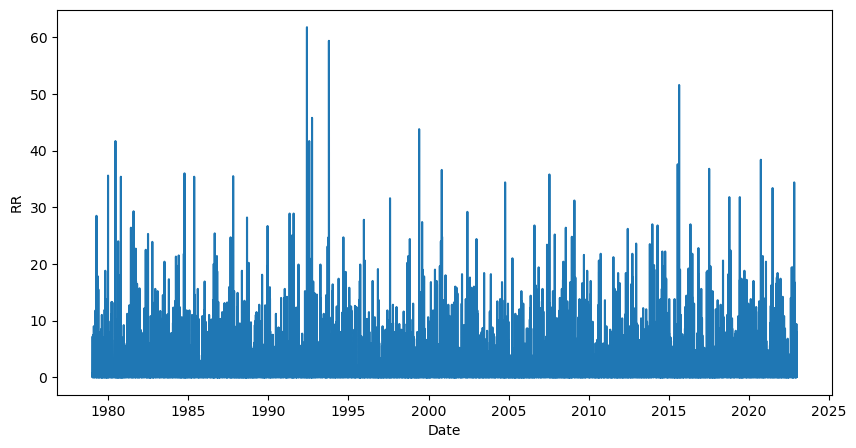

In [364]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('RR')
plt.plot(RR_time_df)

A quick look at `RR` over the years. 

In [365]:
# the "MS" option specifies Monthly frequency by Start day
lw_df_monthly = lw_df.resample("MS").mean()

lw_df_monthly.head()

CC         HU          QQ         TX        TN         TG  \
DATE                                                                          
1979-01-01  5.461538  86.615385   31.692308   4.226923 -3.369231   0.050000   
1979-02-01  6.227273  85.409091   47.227273   4.877273 -0.431818   1.886364   
1979-03-01  5.640000  81.920000  101.640000  10.216000  1.452000   5.424000   
1979-04-01  6.192308  80.461538  124.192308  12.734615  4.342308   8.246154   
1979-05-01  5.266667  78.333333  203.566667  16.240000  6.976667  11.293333   

                  RR           PP        SD        SS    YEAR  MONTH  \
DATE                                                                   
1979-01-01  2.019231  1009.734615  1.615385  2.246154  1979.0    1.0   
1979-02-01  1.109091  1013.427273  0.090909  2.104545  1979.0    2.0   
1979-03-01  2.576000  1004.424000  0.040000  3.760000  1979.0    3.0   
1979-04-01  2.973077  1011.315385  0.000000  2.942308  1979.0    4.0   
1979-05-01  2.863333  1013.943333  0.000000  6.463333  1979.0    5.0   

                  DAY  DAYOFWEEK   DAYOFYEAR  sin_dayofyear  cos_dayofyear  
DATE                                                                        
1979-01-01  16.115385   3.000000   16.115385      -0.000892       0.001501  
1979-02-01  14.772727   3.409091   45.772727      -0.000593      -0.003782  
1979-03-01  16.560000   3.160000   75.560000       0.000203       0.001541  
1979-04-01  15.115385   3.153846  105.115385      -0.000427      -0.001193  
1979-05-01  16.000000   2.933333  136.000000       0.000258       0.000200

In [47]:
import plotly.express as px

# Plotting lw_df_monthly dataframe containing monthly data
fig = px.line(lw_df_monthly, x=lw_df_monthly.index, y=lw_df_monthly.columns)
fig.update_layout(
    yaxis_title="Values",  
    xaxis_title="Date",  
    legend_title="Columns",  
    title="Monthly Data"  
)
fig.show()

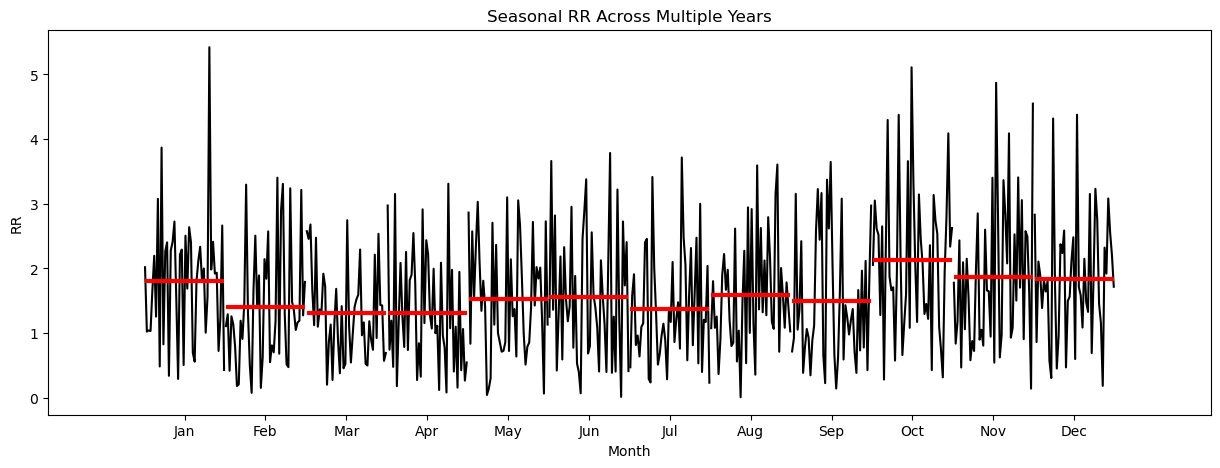

In [48]:
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

month_plot(lw_df_monthly["RR"], ax=plt.gca())

plt.title("Seasonal RR Across Multiple Years")
plt.xlabel("Month")
plt.ylabel("RR")
plt.show()

The above plot helps us visualize the seasonal precipitation patterns throughout the year. The highest precipitation is usually noted in the month of October with the least being in the months of March and April. 

Now we can begin to split the data up into their trend, seasonal and residual using STL. 

In [49]:
stl_decomposition = tsa.STL(lw_df_monthly["RR"], robust=True)

In [50]:
result = stl_decomposition.fit()

In [51]:
result.trend

DATE
1979-01-01    2.089251
1979-02-01    2.035864
1979-03-01    1.983753
1979-04-01    1.932935
1979-05-01    1.883518
                ...   
2022-08-01    1.448241
2022-09-01    1.432402
2022-10-01    1.417987
2022-11-01    1.404997
2022-12-01    1.393328
Freq: MS, Name: trend, Length: 528, dtype: float64

In [52]:
lw_df_monthly["Trend"] = result.trend
lw_df_monthly["Seasonal"] = result.seasonal
lw_df_monthly["Residual"] = lw_df_monthly["RR"] - result.trend - result.seasonal

In [53]:
lw_df_monthly

CC         HU          QQ         TX         TN         TG  \
DATE                                                                           
1979-01-01  5.461538  86.615385   31.692308   4.226923  -3.369231   0.050000   
1979-02-01  6.227273  85.409091   47.227273   4.877273  -0.431818   1.886364   
1979-03-01  5.640000  81.920000  101.640000  10.216000   1.452000   5.424000   
1979-04-01  6.192308  80.461538  124.192308  12.734615   4.342308   8.246154   
1979-05-01  5.266667  78.333333  203.566667  16.240000   6.976667  11.293333   
...              ...        ...         ...        ...        ...        ...   
2022-08-01  3.413793  61.206897  205.344828  27.165517  15.717241  21.268966   
2022-09-01  5.724138  76.000000  123.103448  20.055172  11.700000  15.820690   
2022-10-01  4.774194  82.096774   87.516129  18.151613  10.380645  14.309677   
2022-11-01  5.740741  85.296296   40.148148  13.337037   7.740741  10.537037   
2022-12-01  5.241379  87.793103   25.137931   8.158621   1.455172   4.624138   

                  RR           PP        SD        SS    YEAR  MONTH  \
DATE                                                                   
1979-01-01  2.019231  1009.734615  1.615385  2.246154  1979.0    1.0   
1979-02-01  1.109091  1013.427273  0.090909  2.104545  1979.0    2.0   
1979-03-01  2.576000  1004.424000  0.040000  3.760000  1979.0    3.0   
1979-04-01  2.973077  1011.315385  0.000000  2.942308  1979.0    4.0   
1979-05-01  2.863333  1013.943333  0.000000  6.463333  1979.0    5.0   
...              ...          ...       ...       ...     ...    ...   
2022-08-01  1.027586  1018.441379  0.000000  7.548276  2022.0    8.0   
2022-09-01  2.972414  1013.437931  0.000000  3.955172  2022.0    9.0   
2022-10-01  2.625806  1014.587097  0.000000  4.283871  2022.0   10.0   
2022-11-01  4.548148  1006.674074  0.000000  2.407407  2022.0   11.0   
2022-12-01  1.717241  1011.700000  0.000000  1.934483  2022.0   12.0   

                  DAY  DAYOFWEEK   DAYOFYEAR  sin_dayofyear  cos_dayofyear  \
DATE                                                                         
1979-01-01  16.115385   3.000000   16.115385      -0.000892       0.001501   
1979-02-01  14.772727   3.409091   45.772727      -0.000593      -0.003782   
1979-03-01  16.560000   3.160000   75.560000       0.000203       0.001541   
1979-04-01  15.115385   3.153846  105.115385      -0.000427      -0.001193   
1979-05-01  16.000000   2.933333  136.000000       0.000258       0.000200   
...               ...        ...         ...            ...            ...   
2022-08-01  15.758621   2.931034  227.758621       0.000041       0.000080   
2022-09-01  15.620690   3.137931  258.620690       0.000923       0.001016   
2022-10-01  16.000000   3.064516  289.000000      -0.000006       0.000238   
2022-11-01  14.074074   2.925926  318.074074      -0.000116       0.000090   
2022-12-01  16.137931   2.931034  350.137931      -0.000248      -0.000068   

               Trend  Seasonal  Residual  
DATE                                      
1979-01-01  2.089251 -0.375337  0.305317  
1979-02-01  2.035864 -0.808941 -0.117832  
1979-03-01  1.983753  0.869408 -0.277161  
1979-04-01  1.932935  0.573523  0.466618  
1979-05-01  1.883518  0.512116  0.467699  
...              ...       ...       ...  
2022-08-01  1.448241 -0.422401  0.001746  
2022-09-01  1.432402  0.924691  0.615321  
2022-10-01  1.417987  1.201848  0.005972  
2022-11-01  1.404997  2.882596  0.260555  
2022-12-01  1.393328  0.413964 -0.090051  

[528 rows x 20 columns]

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [55]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=lw_df_monthly.index, y=lw_df_monthly[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

### Forecasting

In [56]:
# Calculate the seasonal difference
lw_df_monthly["seasonal_difference"] = lw_df_monthly["RR"].diff(12)

In [57]:
lw_df_monthly[["RR", "seasonal_difference"]].head(16)

RR  seasonal_difference
DATE                                     
1979-01-01  2.019231                  NaN
1979-02-01  1.109091                  NaN
1979-03-01  2.576000                  NaN
1979-04-01  2.973077                  NaN
1979-05-01  2.863333                  NaN
1979-06-01  1.253333                  NaN
1979-07-01  0.472414                  NaN
1979-08-01  1.077419                  NaN
1979-09-01  0.717241                  NaN
1979-10-01  2.055172                  NaN
1979-11-01  1.779167                  NaN
1979-12-01  2.830769                  NaN
1980-01-01  1.024138            -0.995093
1980-02-01  1.292857             0.183766
1980-03-01  2.457143            -0.118857
1980-04-01  0.744828            -2.228249

#### Seasonal Difference visualized

In [58]:
fig = px.line(lw_df_monthly, x=lw_df_monthly.index, y="seasonal_difference")

fig.update_layout(
    yaxis_title="Seasonal Difference", 
    xaxis_title="Date",
    title="Seasonal Difference of RR over Time"
)

fig.show()

#### Split series for evaluation

In [59]:
# we drop the null values introduced at differencing
train = lw_df_monthly.loc[lw_df_monthly.index <= "2020-01-01", "seasonal_difference"].dropna()
test = lw_df_monthly.loc[lw_df_monthly.index >= "2020-01-01", "seasonal_difference"]

In [60]:
# lw_df_monthly.loc[lw_df_monthly.index >= "2020-01-01", "seasonal_difference"]

In [61]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over Time"
)
fig.show()

### Baseline Forecast and evaluation

Since our differenced series is stationary, we will use the mean (over the training set) as our baseline.

In [62]:

full_index = pd.concat([train, test]).index
base_line = np.full(full_index.shape, np.mean(train))

predictions = pd.Series(data=base_line, index=full_index)

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over Time"
)
fig.show()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 100.04%
Test MAPE on the difference: 99.35%


#### ACF, PACF & ADF

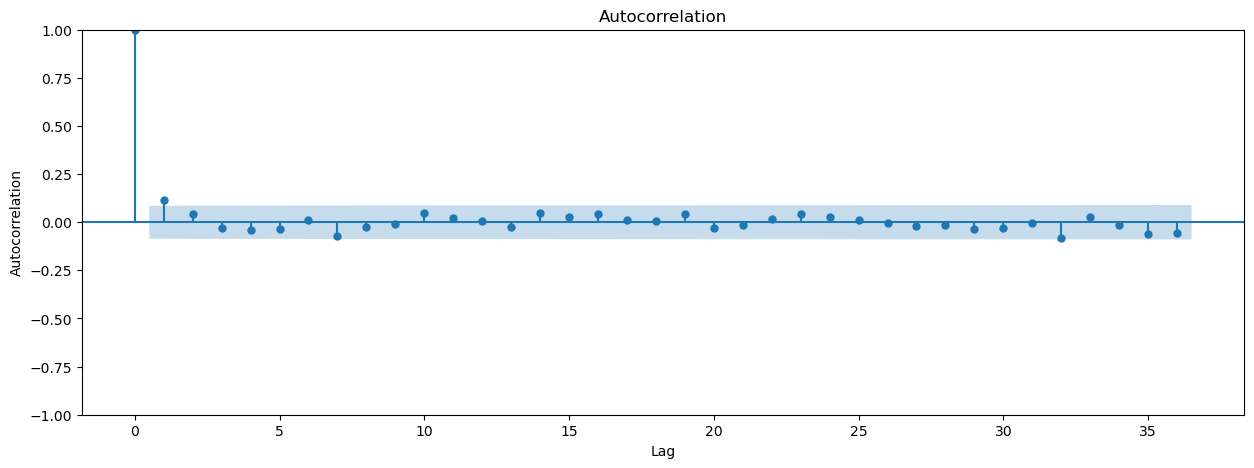

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(lw_df_monthly["RR"], lags=36, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

The shaded area here corresponds to a 95% confidence interval for non-significant correlations.

In [66]:
fig = px.scatter(
    x=lw_df_monthly["RR"], 
    y=lw_df_monthly["RR"].shift(1) # 1-month lagged observations
)
fig.update_layout(
    xaxis_title="RR on Current Month", 
    yaxis_title="RR 1-month Lagged"
)
fig.show()

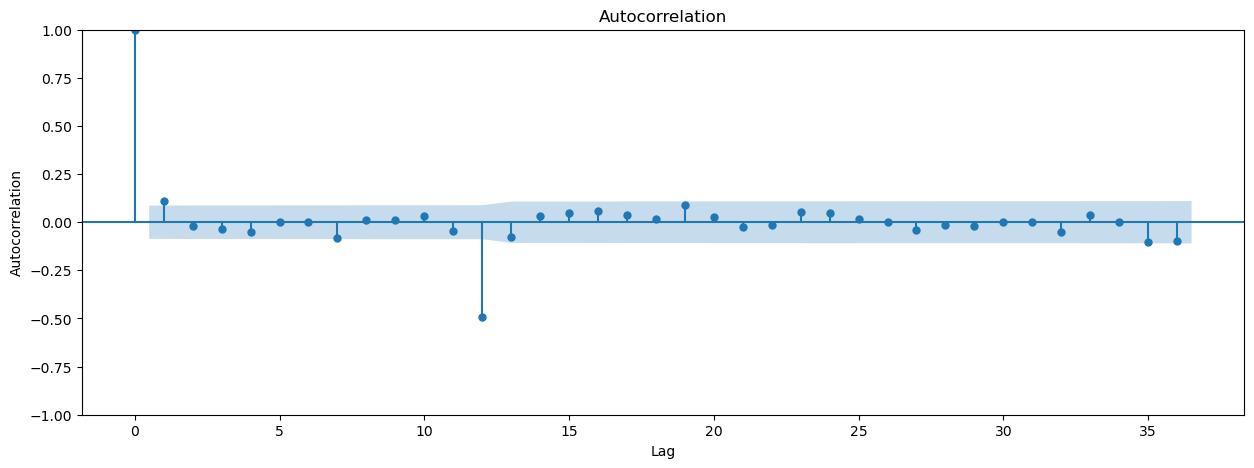

In [67]:
plt.figure(figsize=(15, 5))
plot_acf(lw_df_monthly["seasonal_difference"].dropna(), lags=36, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [68]:
# Calculate autocorrelation for lag 1 and lag 12
autocorr_lag1 = lw_df_monthly["seasonal_difference"].autocorr(lag=1)
autocorr_lag12 = lw_df_monthly["seasonal_difference"].autocorr(lag=12)

print("Autocorrelation at lag 1:", autocorr_lag1)
print("Autocorrelation at lag 12:", autocorr_lag12)

Autocorrelation at lag 1: 0.11087704828912592
Autocorrelation at lag 12: -0.5079146874953182


With the above information, the peak at lag 1 inidicates a weak but significant correlation between consecutive observations. The peak at lag 12 indicates there is a moderate negative correlation between observations that are 12 months apart. This implies that annualy, there is some level of inverse relationship or dissimilarity between the seasonal differences observed in the same month across different years.

The _partial autocorrelation_ is the autocorrelation after removing the effect of any correlations resulting from terms at shorter lags. We can get this plot using the _partial auto-correlation function_ (`pacf`) from `statsmodels`.

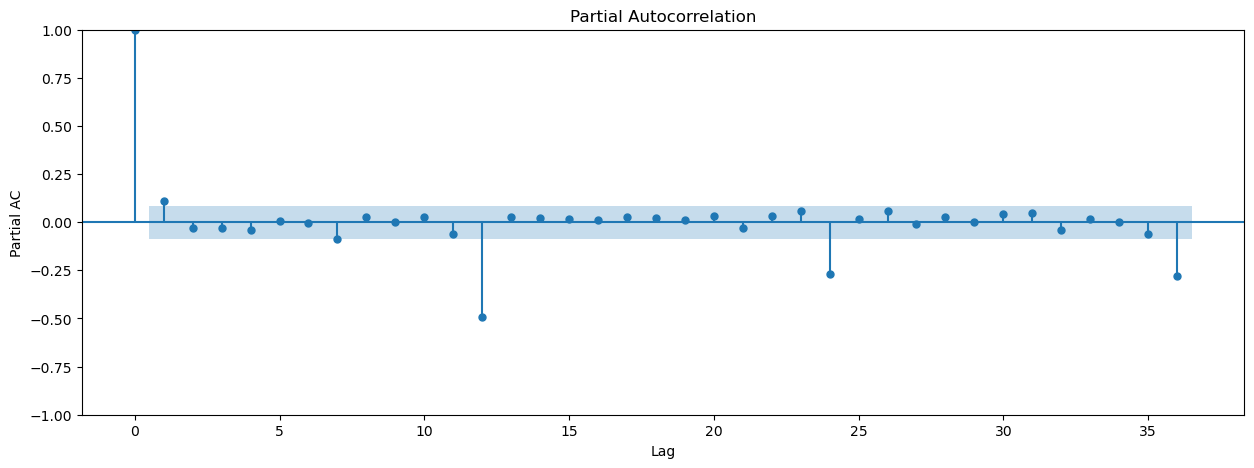

In [69]:
plt.figure(figsize=(15, 5))
plot_pacf(lw_df_monthly["seasonal_difference"].dropna(), lags=36, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

In [70]:
# Calculate partial autocorrelation for lag 1, 12, and 24
pacf_values = pacf(lw_df_monthly["seasonal_difference"].dropna(), nlags=36, method='ywm')

# Extract partial autocorrelation values at specific lags
pacf_lag1 = pacf_values[1]
pacf_lag12 = pacf_values[12]
pacf_lag24 = pacf_values[24]
pacf_lag36 = pacf_values[36]

print("Partial Autocorrelation at lag 1:", pacf_lag1)
print("Partial Autocorrelation at lag 12:", pacf_lag12)
print("Partial Autocorrelation at lag 24:", pacf_lag24)
print("Partial Autocorrelation at lag 36:", pacf_lag36)

Partial Autocorrelation at lag 1: 0.11080914647045528
Partial Autocorrelation at lag 12: -0.49051300277039683
Partial Autocorrelation at lag 24: -0.26952596316622734
Partial Autocorrelation at lag 36: -0.2783453366016648


Now we can see an additional significant peak at lag 24 & 36. It suggests that there is a weak negative partial auto correlation. As with lag 12, it seems to imply some longer-term cyclicality.

### ADF

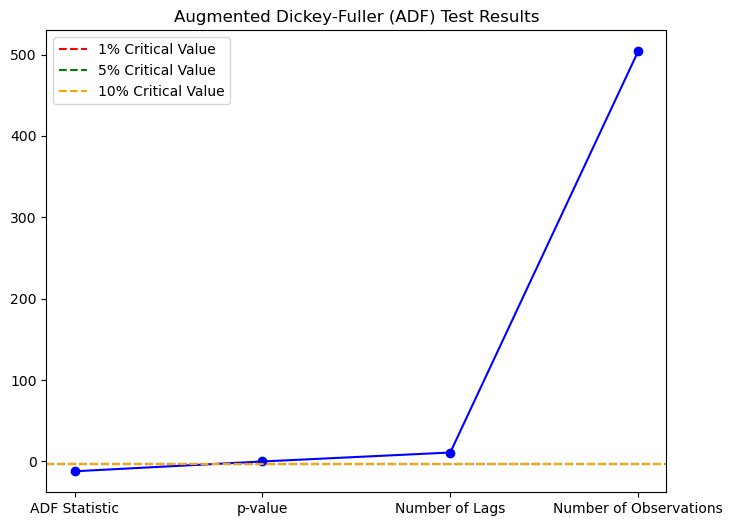

ADF Statistic: -12.04712820961759
p-value: 2.6489739377167136e-22


In [71]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(lw_df_monthly["seasonal_difference"].dropna())

# Extract test statistics and p-value
adf_statistic = adf_result[0]
adf_pvalue = adf_result[1]

# Plot ADF test results
plt.figure(figsize=(8, 6))
plt.plot(adf_result[0:4], marker='o', linestyle='-', color='b')
plt.title('Augmented Dickey-Fuller (ADF) Test Results')
plt.xticks(range(4), ['ADF Statistic', 'p-value', 'Number of Lags', 'Number of Observations'])
plt.axhline(y=adf_result[4]['1%'], color='r', linestyle='--', label='1% Critical Value')
plt.axhline(y=adf_result[4]['5%'], color='g', linestyle='--', label='5% Critical Value')
plt.axhline(y=adf_result[4]['10%'], color='orange', linestyle='--', label='10% Critical Value')
plt.legend()
plt.show()

# Print ADF test results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {adf_pvalue}')

With such a small p-value we can conclude that the season difference timeseries is stationary. 

#### Fitting an SARIMA model with `statsmodels`

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#capture non seasonal 
p_param = 1
d_param = 0 # Due to the fact that we know timeseries is stationary
q_param = 1
#capture seasonal moving average at lag 12
P_param = 1
D_param = 0
Q_param = 1
s_param = 12 

model = SARIMAX(train, order=(p_param, d_param, q_param), seasonal_order=(P_param, D_param, Q_param, s_param), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                seasonal_difference   No. Observations:                  481
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -678.378
Date:                            Mon, 05 Feb 2024   AIC                           1368.756
Time:                                    19:25:33   BIC                           1393.811
Sample:                                01-01-1980   HQIC                          1378.604
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0028      0.005      0.620      0.535      -0.006       0.012
ar.L1          0.1301      0.480      0.271      0.786      -0.810       1.071
ma.L1         -0.0329      0.482     -0.068      0.946      -0.977       0.911
ar.S.L12      -0.0362      0.053     -0.684      0.494      -0.140       0.068
ma.S.L12      -0.9641      0.041    -23.438      0.000      -1.045      -0.884
sigma2         0.9196      0.066     13.965      0.000       0.791       1.049
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.40
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.64
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we can try and forecast using our SARIMAX model

### SARIMAX 

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

# Filter the seasonal difference data for train and test ranges
train = lw_df_monthly.loc[lw_df_monthly.index <= "2020-01-01", "seasonal_difference"].dropna()
test = lw_df_monthly.loc[lw_df_monthly.index >= "2020-01-01", "seasonal_difference"]

# Perform STL decomposition on the seasonal difference data
stl_decomposition = STL(train, robust=True)
result = stl_decomposition.fit()

# Obtain decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Define SARIMA parameters based on results from ADF, ACF & PCAF 
order = (1, 0, 1)  # ARIMA order
seasonal_order = (1,0,1,24)  # Seasonal order (monthly data)

# Create SARIMA model for trend component
sarima_model_trend = SARIMAX(trend, order=order, seasonal_order=seasonal_order)
sarima_result_trend = sarima_model_trend.fit()

# Forecast future values for trend component
trend_forecast = sarima_result_trend.forecast(steps=len(test))

# Create SARIMA model for seasonal component
sarima_model_seasonal = SARIMAX(seasonal, order=order, seasonal_order=seasonal_order)
sarima_result_seasonal = sarima_model_seasonal.fit()

# Forecast future values for seasonal component
seasonal_forecast = sarima_result_seasonal.forecast(steps=len(test))

# Create SARIMA model for residual component
sarima_model_residual = SARIMAX(residual, order=order, seasonal_order=seasonal_order)
sarima_result_residual = sarima_model_residual.fit()

# Forecast future values for residual component
residual_forecast = sarima_result_residual.forecast(steps=len(test))

# Combine forecasts from individual components to obtain final forecast
final_forecast = trend_forecast + seasonal_forecast + residual_forecast

# Plot the actual seasonal difference and final forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train (Actual)"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test (Actual)"))
fig.add_trace(go.Scatter(x=test.index, y=final_forecast.values, mode='lines', name="Forecast"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Seasonal Difference", 
    xaxis_title="Date",
    title="Seasonal Difference Forecast using SARIMA"
)
fig.show()

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [74]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, final_forecast.values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(test, final_forecast.values)

# Calculate MAPE
mape = mean_absolute_percentage_error(test, final_forecast.values)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 2.16
Root Mean Squared Error (RMSE): 1.47
R-squared (R2): -0.08
Mean Absolute Percentage Error (MAPE): 217.73%


Our Seasonal Differernce forecast shows a very poor fit to the test set. Let's see how well the forecast does in plotting actual values for `RR`. 

#### `RR` Values

In [75]:
# Define functions to calculate statistical metrics
def mean_absolute_percentage_error(true_values, predicted_values):
    absolute_percentage_error = np.abs((true_values - predicted_values) / true_values)
    return np.mean(absolute_percentage_error) * 100

def mean_squared_error(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

def root_mean_squared_error(true_values, predicted_values):
    return np.sqrt(mean_squared_error(true_values, predicted_values))

def r_squared(true_values, predicted_values):
    total_variation = np.sum((true_values - np.mean(true_values)) ** 2)
    unexplained_variation = np.sum((true_values - predicted_values) ** 2)
    return 1 - (unexplained_variation / total_variation)

In [76]:
# Split train and test ranges
train = lw_df_monthly.loc[lw_df_monthly.index <= "2020-01-01"].dropna()
test = lw_df_monthly.loc[lw_df_monthly.index >= "2020-01-01"]


In [77]:
# Perform STL decomposition on the train data
stl_decomposition = STL(train["RR"], robust=True)
result = stl_decomposition.fit()

# Define SARIMA parameters based on the results from ADF, ACF, and PACF
order = (1, 0, 1)  # ARIMA order
seasonal_order = (1, 0, 1, 24)  # Seasonal order (monthly data)

# Create SARIMA models for each component
sarima_model_trend = SARIMAX(result.trend, order=order, seasonal_order=seasonal_order)
sarima_result_trend = sarima_model_trend.fit()
trend_forecast = sarima_result_trend.forecast(steps=len(test))

sarima_model_seasonal = SARIMAX(result.seasonal, order=order, seasonal_order=seasonal_order)
sarima_result_seasonal = sarima_model_seasonal.fit()
seasonal_forecast = sarima_result_seasonal.forecast(steps=len(test))

sarima_model_residual = SARIMAX(result.resid, order=order, seasonal_order=seasonal_order)
sarima_result_residual = sarima_model_residual.fit()
residual_forecast = sarima_result_residual.forecast(steps=len(test))

# Combine forecasts from individual components to obtain the final forecast
final_forecast = trend_forecast + seasonal_forecast + residual_forecast

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [78]:
# Plot the actual RR values and final forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train["RR"], mode='lines', name="Train Actual RR"))
fig.add_trace(go.Scatter(x=test.index, y=test["RR"], mode='lines', name="Test Actual RR"))
fig.add_trace(go.Scatter(x=test.index, y=final_forecast, mode='lines', name="Forecast"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="RR", 
    xaxis_title="Date",
    title="RR Forecast using SARIMA"
)
fig.show()

In [79]:
# Calculate statistical metrics
mape = mean_absolute_percentage_error(test["RR"], final_forecast)
mse = mean_squared_error(test["RR"], final_forecast)
rmse = root_mean_squared_error(test["RR"], final_forecast)
r2 = r_squared(test["RR"], final_forecast)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAPE: 245.55%
MSE: 1.36
RMSE: 1.17
R-squared: -0.13


We still have a poor fit for our forecast. Perhaps as a next step, we should approach this with a model suited for multivariate data such as VARMA. We could also explore forecasting methods by using DeepAR, LSTM or Facebook Prophet. 

## 3. Regressor Models

Let's see how we can approach this with just a couple regressor boost models. The two models I want to look at would be LGBM & XGBoost. For each model, there will be a baseline, feature & tuned model.

In [80]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14852 entries, 1979-01-01 to 2022-12-31
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CC             14852 non-null  float64
 1   HU             14852 non-null  float64
 2   QQ             14852 non-null  float64
 3   TX             14852 non-null  float64
 4   TN             14852 non-null  float64
 5   TG             14852 non-null  float64
 6   RR             14852 non-null  float64
 7   PP             14852 non-null  float64
 8   SD             14852 non-null  float64
 9   SS             14852 non-null  float64
 10  YEAR           14852 non-null  int32  
 11  MONTH          14852 non-null  int32  
 12  DAY            14852 non-null  int32  
 13  DAYOFWEEK      14852 non-null  int32  
 14  DAYOFYEAR      14852 non-null  int32  
 15  sin_dayofyear  14852 non-null  float64
 16  cos_dayofyear  14852 non-null  float64
dtypes: float64(12), int32(5)
memory u

Let's bring `DATE` back

In [81]:
lw_df.reset_index(inplace=True)

In [82]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS  \
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0   
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7   
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0   
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0   
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0   
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...   
14847 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5   
14848 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0   
14849 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5   
14850 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1   
14851 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0   

       YEAR  MONTH  DAY  DAYOFWEEK  DAYOFYEAR  sin_dayofyear  cos_dayofyear  
0      1979      1    1          0          1       0.014446       0.009275  
1      1979      1    2          1          2       0.015610      -0.007144  
2      1979      1    3          2          3       0.002423      -0.016995  
3      1979      1    4          3          4      -0.012992      -0.011221  
4      1979      1    5          4          5      -0.016462       0.004870  
...     ...    ...  ...        ...        ...            ...            ...  
14847  2022     12   27          1        361       0.004796      -0.016484  
14848  2022     12   28          2        362      -0.011279      -0.012942  
14849  2022     12   29          3        363      -0.016984       0.002498  
14850  2022     12   30          4        364      -0.007074       0.015642  
14851  2022     12   31          5        365       0.009340       0.014404  

[14852 rows x 18 columns]

In [83]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           14852 non-null  datetime64[ns]
 1   CC             14852 non-null  float64       
 2   HU             14852 non-null  float64       
 3   QQ             14852 non-null  float64       
 4   TX             14852 non-null  float64       
 5   TN             14852 non-null  float64       
 6   TG             14852 non-null  float64       
 7   RR             14852 non-null  float64       
 8   PP             14852 non-null  float64       
 9   SD             14852 non-null  float64       
 10  SS             14852 non-null  float64       
 11  YEAR           14852 non-null  int32         
 12  MONTH          14852 non-null  int32         
 13  DAY            14852 non-null  int32         
 14  DAYOFWEEK      14852 non-null  int32         
 15  DAYOFYEAR      1485

## LGBM 

LGBM uses a gradient based learning algorithm, which allows it to handle non-linear relationships between features and the target variable effectively. 

In [84]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


#### Baseline LGBM 

In [85]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df.drop(columns=["RR", "DATE"])
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model = LGBMRegressor()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

baseline_train_mae = mean_absolute_error(y_train, y_pred_train)
baseline_val_mae = mean_absolute_error(y_val, y_pred_val)
baseline_test_mae = mean_absolute_error(y_test, y_pred_test)

baseline_train_mse = mean_squared_error(y_train, y_pred_train)
baseline_val_mse = mean_squared_error(y_val, y_pred_val)
baseline_test_mse = mean_squared_error(y_test, y_pred_test)

baseline_train_r2 = r2_score(y_train, y_pred_train)
baseline_val_r2 = r2_score(y_val, y_pred_val)
baseline_test_r2 = r2_score(y_test, y_pred_test)

baseline_train_rmse = np.sqrt(baseline_train_mse)
baseline_val_rmse = np.sqrt(baseline_val_mse)
baseline_test_rmse = np.sqrt(baseline_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']
baseline_train_scores = [baseline_train_r2, baseline_train_mae, baseline_train_mse, baseline_train_rmse]
baseline_val_scores = [baseline_val_r2, baseline_val_mae, baseline_val_mse, baseline_val_rmse]
baseline_test_scores = [baseline_test_r2, baseline_test_mae, baseline_test_mse, baseline_test_rmse]

print("Metrics Used:", metrics)
print("Train Scores:", baseline_train_scores)
print("Validation Scores:", baseline_val_scores)
print("Test Scores:", baseline_test_scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 11881, number of used features: 16
[LightGBM] [Info] Start training from score 1.593923
Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.5719690329373102, 1.2807160932591928, 5.704599780931776, 2.388430401106923]
Validation Scores: [0.2534496302993996, 1.657197954432808, 11.263967029399975, 3.3561834022293797]
Test Scores: [0.2278989522726037, 1.567559177986569, 8.666658270193736, 2.9439188627055835]


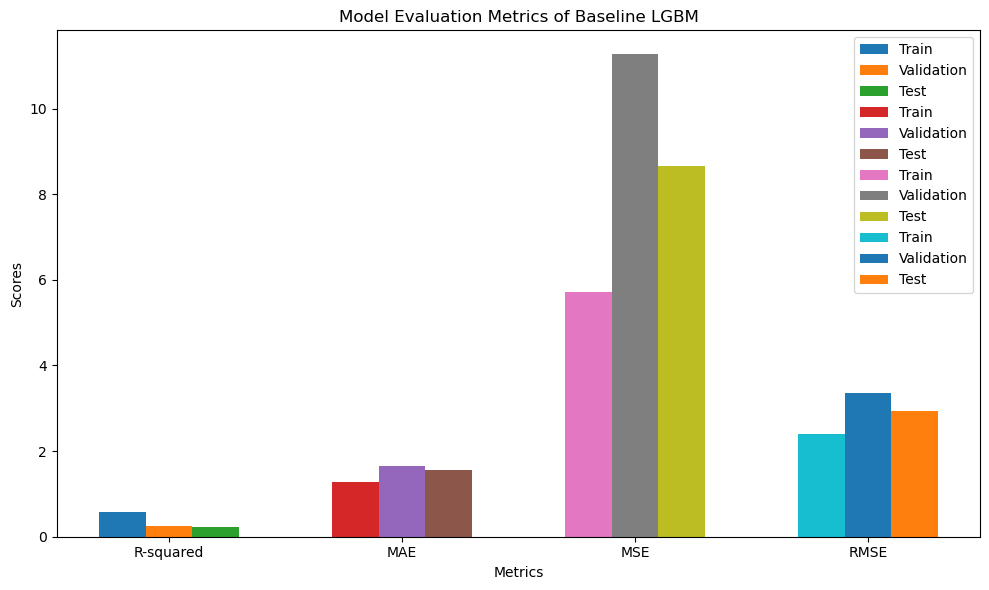

In [86]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting train, validation, and test scores for each metric
for i, metric in enumerate(metrics):
    plt.bar(i-0.2, baseline_train_scores[i], width=0.2, label='Train')
    plt.bar(i, baseline_val_scores[i], width=0.2, label='Validation')
    plt.bar(i+0.2, baseline_test_scores[i], width=0.2, label='Test')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics of Baseline LGBM')
plt.xticks(range(len(metrics)), metrics)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

From this we can gather we have some pretty low R2 values. Perhaps we can try some feature selection to help in improving this. We can use SHAP to help us with this.

### Using SHAP to interpret feature selection

SHAP will help us select the most important features within our dataframe.

In [87]:
pip install shap 

Note: you may need to restart the kernel to use updated packages.


In [88]:
import shap

In [89]:
shap_explain = shap.Explainer(model)

In [90]:
shap_eval = shap_explain(X_train)

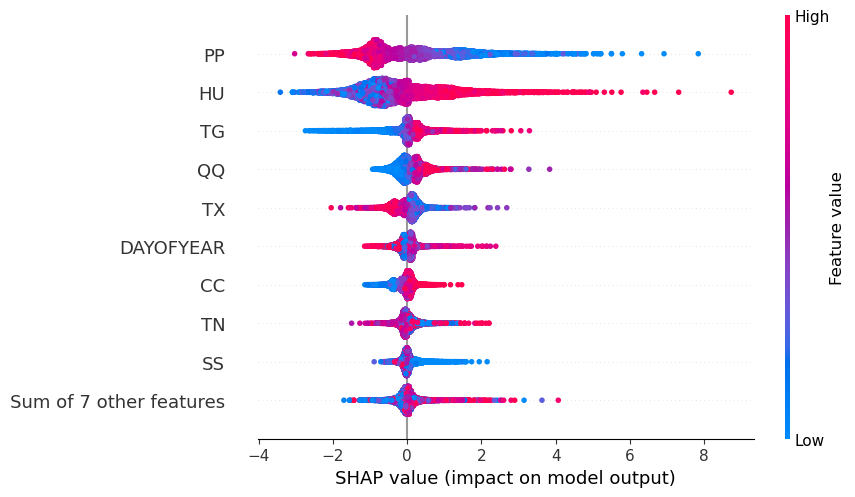

In [91]:
shap.plots.beeswarm(shap_eval, show=False)
labels = [y_labels.get_text() for y_labels in reversed(plt.gca().yaxis.get_majorticklabels())]


The graph showcases in order of feature importance with respect to RR (precipitation). The top nine features that show the most importance (PP, HU, TG, QQ, TX, DAYOFYEAR, CC, TN & SS). 
Here's an example on how it can be interpreted:

PP - The higher the pressure the less chance of precipitation there is. 

In [92]:
vals = []

In [93]:
for k in X_train.columns:
    if k not in labels:
        vals.append(k)


In [94]:
vals

['SD', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'sin_dayofyear', 'cos_dayofyear']

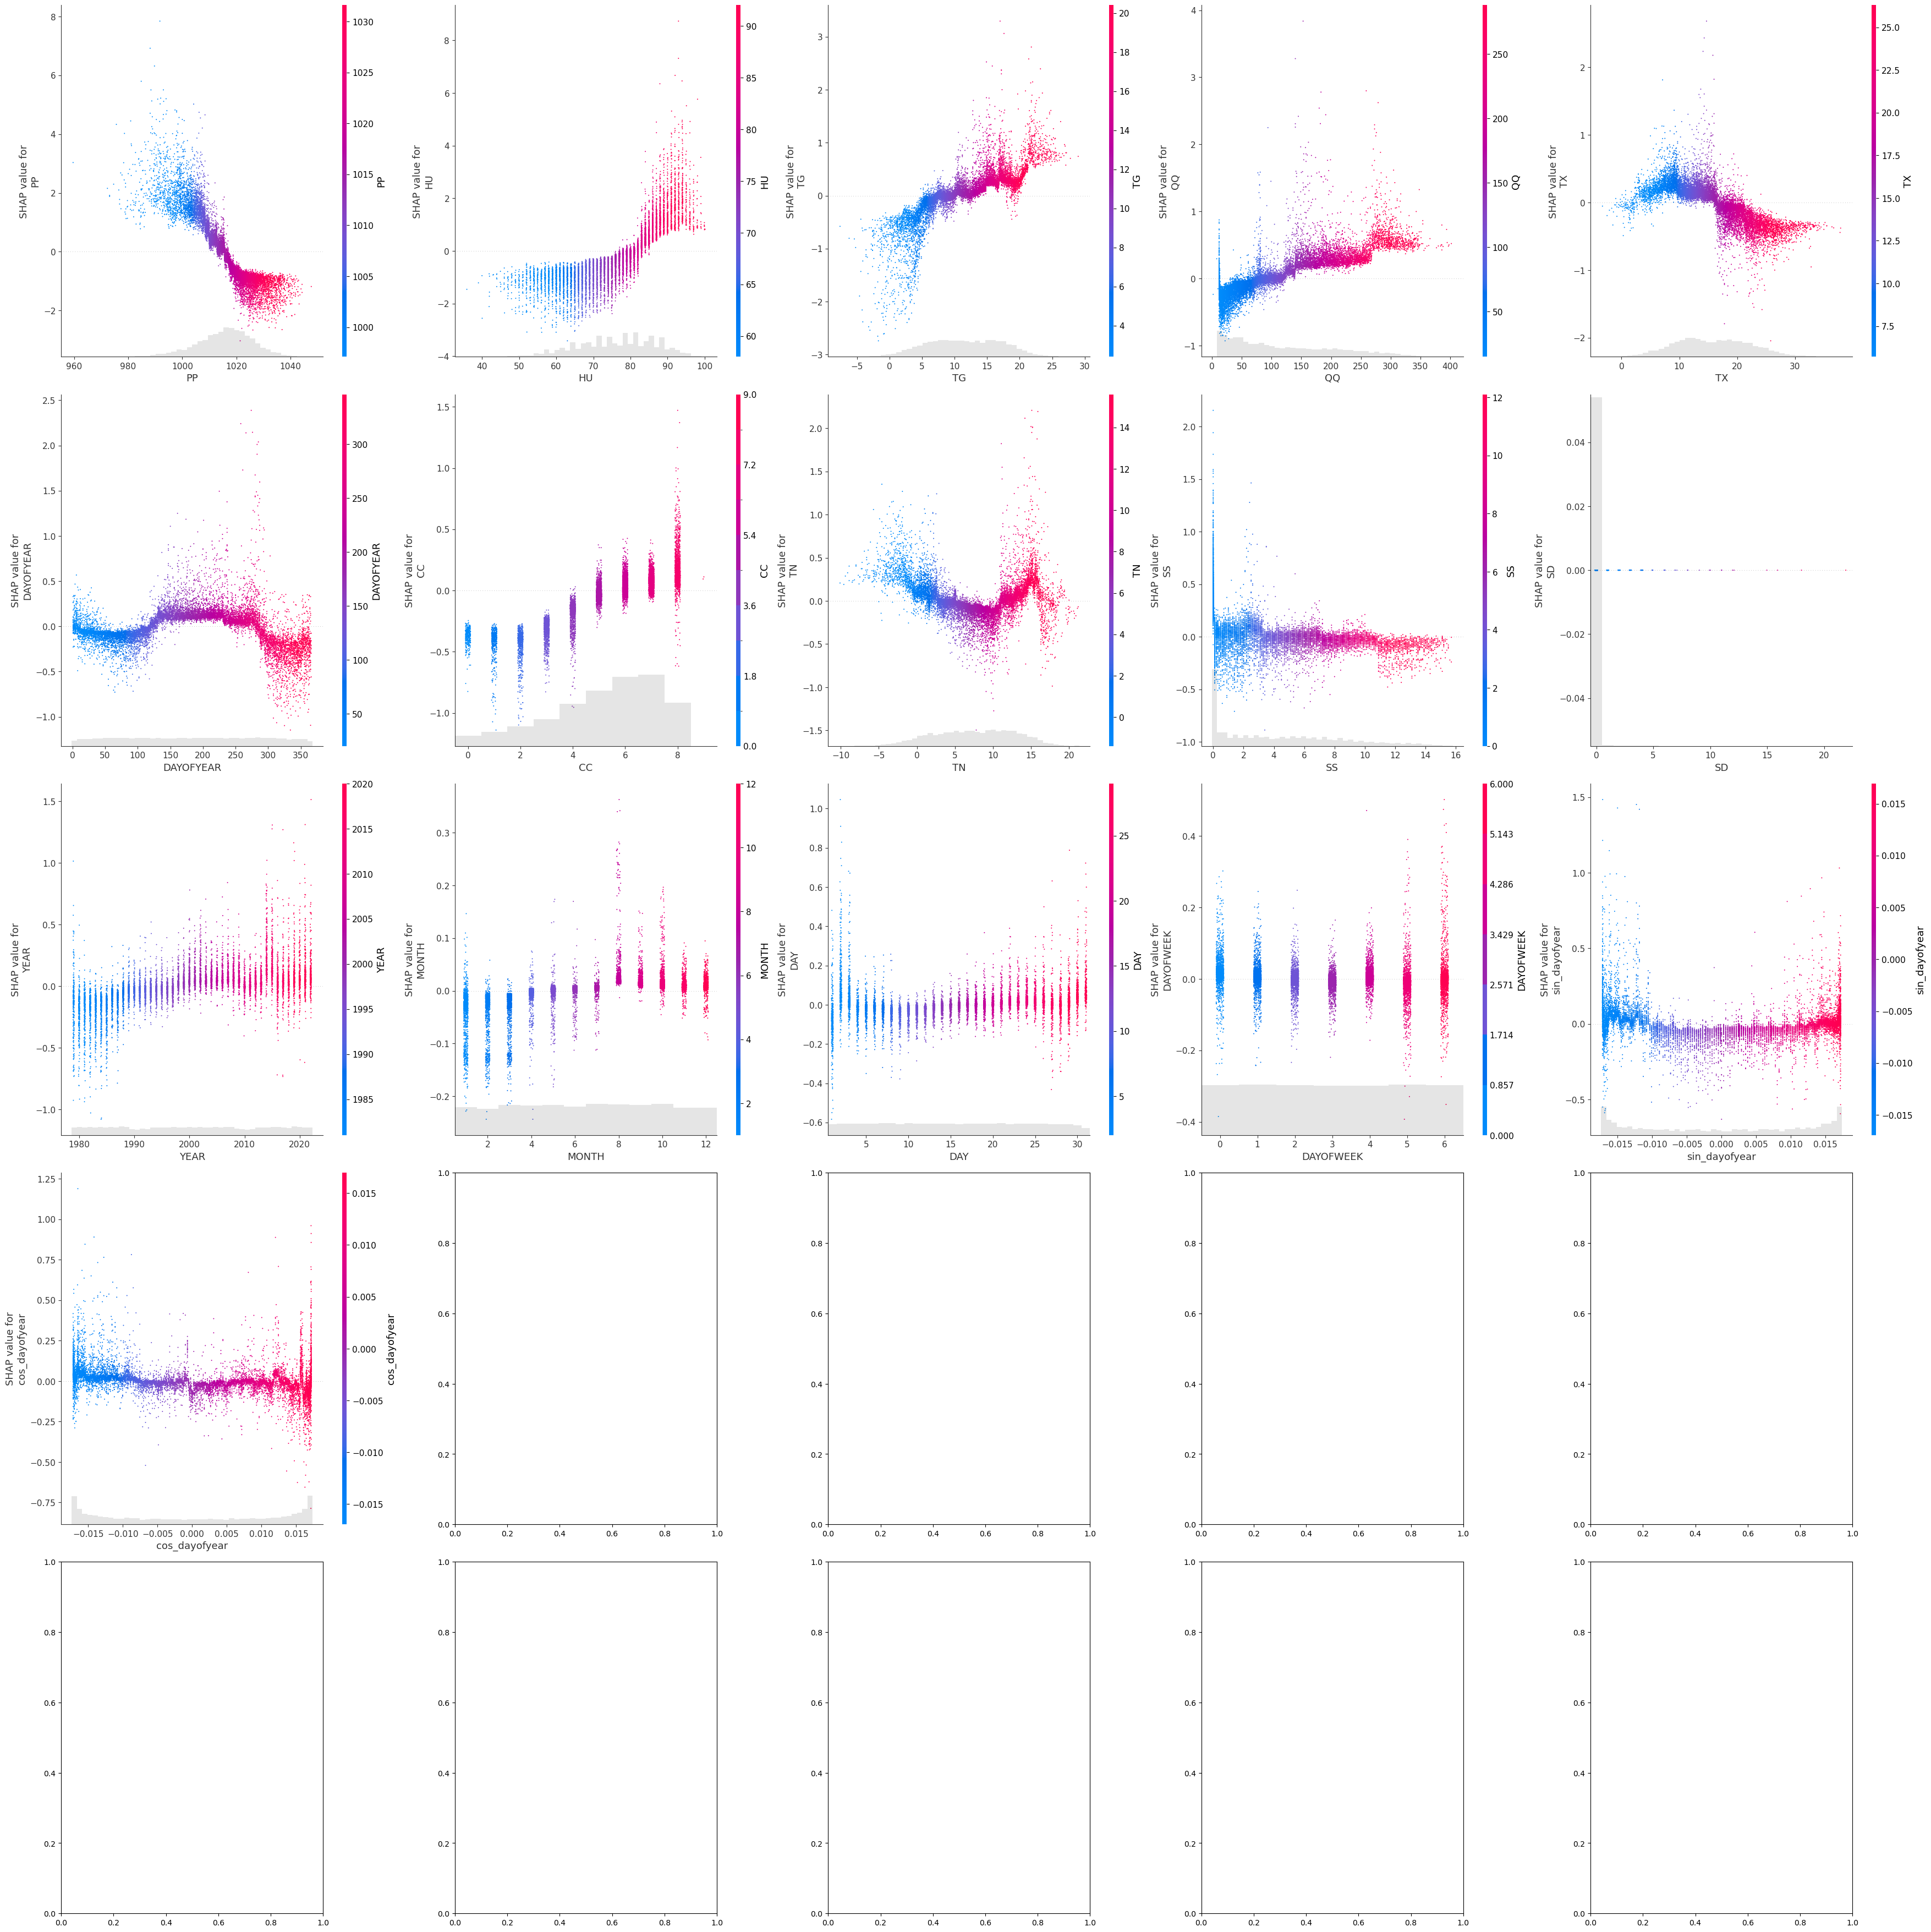

In [95]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(35, 35), constrained_layout=True)
axs= axes.ravel()

for i, feat in enumerate(list(X_train[labels[:-1]].columns.values) + vals):
    shap.plots.scatter(shap_eval[:, feat], dot_size=2, color=shap_eval[:, feat], ax=axs[i], show=False)


With PP:
The lower (bluer) the pressure (PP) the higher the chance of RR (precipitation. The range ~ 1005 hPa and ~1015 hPa could be considered a correlator of higher or lower RR. The graph also shows a lower variance of high pressure (cluster we saw earlier even with the graph above), while there is a high variance of low pressure values with respect to correlating to precipitation. 

### Second iteration of LGBM

In this next iteration, we'll see if using only the top nine features as seen on SHAP. Perhaps this will help in improving our performance metrics.

In [96]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df[["PP", "HU", "TG", "QQ", "TX", "DAYOFYEAR", "CC", "TN", "SS"]]
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model2 = LGBMRegressor()
model2.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred_train = model2.predict(X_train)
y_pred_val = model2.predict(X_val)
y_pred_test = model2.predict(X_test)

feature_train_mae = mean_absolute_error(y_train, y_pred_train)
feature_val_mae = mean_absolute_error(y_val, y_pred_val)
feature_test_mae = mean_absolute_error(y_test, y_pred_test)

feature_train_mse = mean_squared_error(y_train, y_pred_train)
feature_val_mse = mean_squared_error(y_val, y_pred_val)
feature_test_mse = mean_squared_error(y_test, y_pred_test)

feature_train_r2 = r2_score(y_train, y_pred_train)
feature_val_r2 = r2_score(y_val, y_pred_val)
feature_test_r2 = r2_score(y_test, y_pred_test)

feature_train_rmse = np.sqrt(feature_train_mse)
feature_val_rmse = np.sqrt(feature_val_mse)
feature_test_rmse = np.sqrt(feature_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']
feature_train_scores = [feature_train_r2, feature_train_mae, feature_train_mse, feature_train_rmse]
feature_val_scores = [feature_val_r2, feature_val_mae, feature_val_mse, feature_val_rmse]
feature_test_scores = [feature_test_r2, feature_test_mae, feature_test_mse, feature_test_rmse]

print("Metrics Used:", metrics)
print("Train Scores:", feature_train_scores)
print("Validation Scores:", feature_val_scores)
print("Test Scores:", feature_test_scores)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1714
[LightGBM] [Info] Number of data points in the train set: 11881, number of used features: 9
[LightGBM] [Info] Start training from score 1.593923
Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.5453328130717003, 1.3167218537739436, 6.059595063289359, 2.4616244764970467]
Validation Scores: [0.24508764567908692, 1.651891418970737, 11.390132821938964, 3.3749270839440317]
Test Scores: [0.20372033996801986, 1.5912915185969587, 8.938057682107646, 2.9896584557617354]


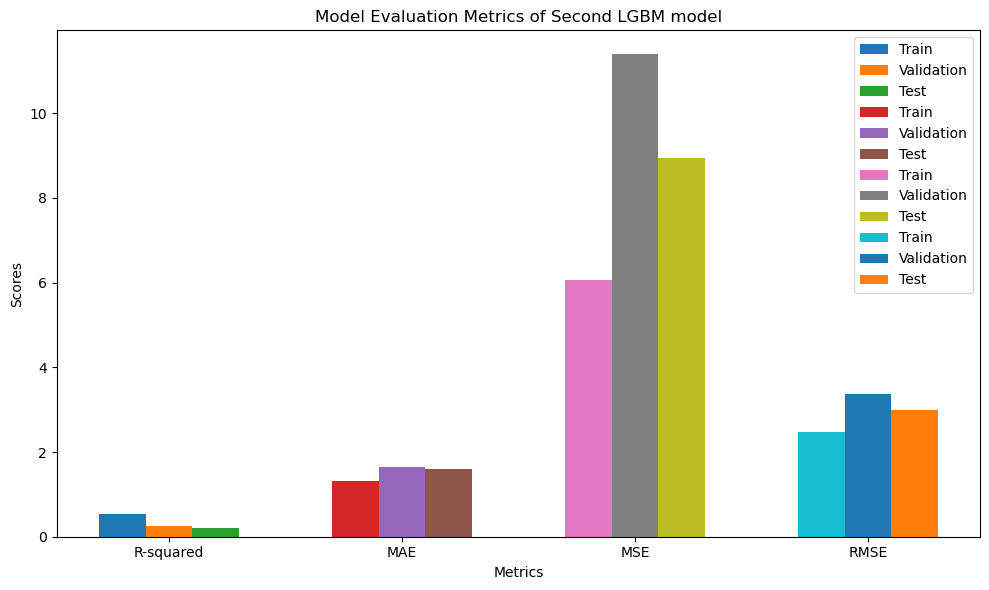

In [97]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting train, validation, and test scores for each metric
for i, metric in enumerate(metrics):
    plt.bar(i-0.2, feature_train_scores[i], width=0.2, label='Train')
    plt.bar(i, feature_val_scores[i], width=0.2, label='Validation')
    plt.bar(i+0.2, feature_test_scores[i], width=0.2, label='Test')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics of Second LGBM model')
plt.xticks(range(len(metrics)), metrics)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### Hyperparameterization using grid search for the LGBM model

Perhaps we can improve the model with the use of hyperparameterization.

In [98]:
from sklearn.model_selection import GridSearchCV

# Step 1: Model to use
model2 = LGBMRegressor()

# Step 2: Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Step 3: Create the gridsearch 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 4: Fit the gridsearch to data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best score
best_params = grid_search.best_params_


print("Best Parameters:", best_params)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1714
[LightGBM] [Info] Number of data points in the train set: 11881, number of used features: 9
[LightGBM] [Info] Start training from score 1.593923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### Try model 2 with hyperparameters tuning

In [99]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df[["PP", "HU", "TG", "QQ", "TX", "DAYOFYEAR", "CC", "TN", "SS"]]
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model2 = LGBMRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)
model2.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred_train = model2.predict(X_train)
y_pred_val = model2.predict(X_val)
y_pred_test = model2.predict(X_test)

tuned_train_mae = mean_absolute_error(y_train, y_pred_train)
tuned_val_mae = mean_absolute_error(y_val, y_pred_val)
tuned_test_mae = mean_absolute_error(y_test, y_pred_test)

tuned_train_mse = mean_squared_error(y_train, y_pred_train)
tuned_val_mse = mean_squared_error(y_val, y_pred_val)
tuned_test_mse = mean_squared_error(y_test, y_pred_test)

tuned_train_r2 = r2_score(y_train, y_pred_train)
tuned_val_r2 = r2_score(y_val, y_pred_val)
tuned_test_r2 = r2_score(y_test, y_pred_test)

tuned_train_rmse = np.sqrt(tuned_train_mse)
tuned_val_rmse = np.sqrt(tuned_val_mse)
tuned_test_rmse = np.sqrt(tuned_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']
tuned_train_scores = [tuned_train_r2, tuned_train_mae, tuned_train_mse, tuned_train_rmse]
tuned_val_scores = [tuned_val_r2, tuned_val_mae, tuned_val_mse, tuned_val_rmse]
tuned_test_scores = [tuned_test_r2, tuned_test_mae, tuned_test_mse, tuned_test_rmse]

print("Metrics Used:", metrics)
print("Train Scores:", tuned_train_scores)
print("Validation Scores:", tuned_val_scores)
print("Test Scores:", tuned_test_scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1714
[LightGBM] [Info] Number of data points in the train set: 11881, number of used features: 9
[LightGBM] [Info] Start training from score 1.593923
Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.2841343614627895, 1.5965420727557498, 9.540727842193368, 3.088806863854289]
Validation Scores: [0.22204493992015628, 1.6888924474803049, 11.737801630998494, 3.426047523166965]
Test Scores: [0.22557856539475252, 1.5902438065934859, 8.692704083995142, 2.9483392077566553]


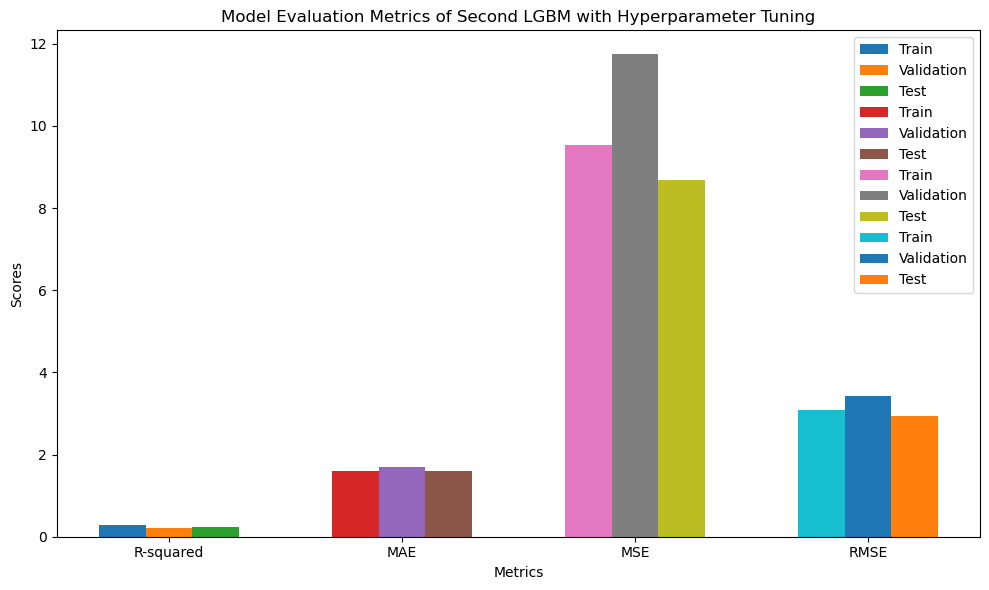

In [100]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting train, validation, and test scores for each metric
for i, metric in enumerate(metrics):
    plt.bar(i-0.2, tuned_train_scores[i], width=0.2, label='Train')
    plt.bar(i, tuned_val_scores[i], width=0.2, label='Validation')
    plt.bar(i+0.2, tuned_test_scores[i], width=0.2, label='Test')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics of Second LGBM with Hyperparameter Tuning')
plt.xticks(range(len(metrics)), metrics)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

## Comparing metrics of different models for LGBM

In [101]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [baseline_train_scores[i] for i in range(len(metrics))]
val_scores = [baseline_val_scores[i] for i in range(len(metrics))]
test_scores = [baseline_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Baseline LGBM Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Baseline LGBM Model:
Metric     Train      Validation   Test    
R2         0.5720     0.2534       0.2279  
MAE        1.2807     1.6572       1.5676  
MSE        5.7046     11.2640      8.6667  
RMSE       2.3884     3.3562       2.9439  


In [102]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [feature_train_scores[i] for i in range(len(metrics))]
val_scores = [feature_val_scores[i] for i in range(len(metrics))]
test_scores = [feature_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Feature Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Feature Model:
Metric     Train      Validation   Test    
R2         0.5453     0.2451       0.2037  
MAE        1.3167     1.6519       1.5913  
MSE        6.0596     11.3901      8.9381  
RMSE       2.4616     3.3749       2.9897  


In [103]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [tuned_train_scores[i] for i in range(len(metrics))]
val_scores = [tuned_val_scores[i] for i in range(len(metrics))]
test_scores = [tuned_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Tuned Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Tuned Model:
Metric     Train      Validation   Test    
R2         0.2841     0.2220       0.2256  
MAE        1.5965     1.6889       1.5902  
MSE        9.5407     11.7378      8.6927  
RMSE       3.0888     3.4260       2.9483  


#### Visualising the metrics

#### R2 Comparison

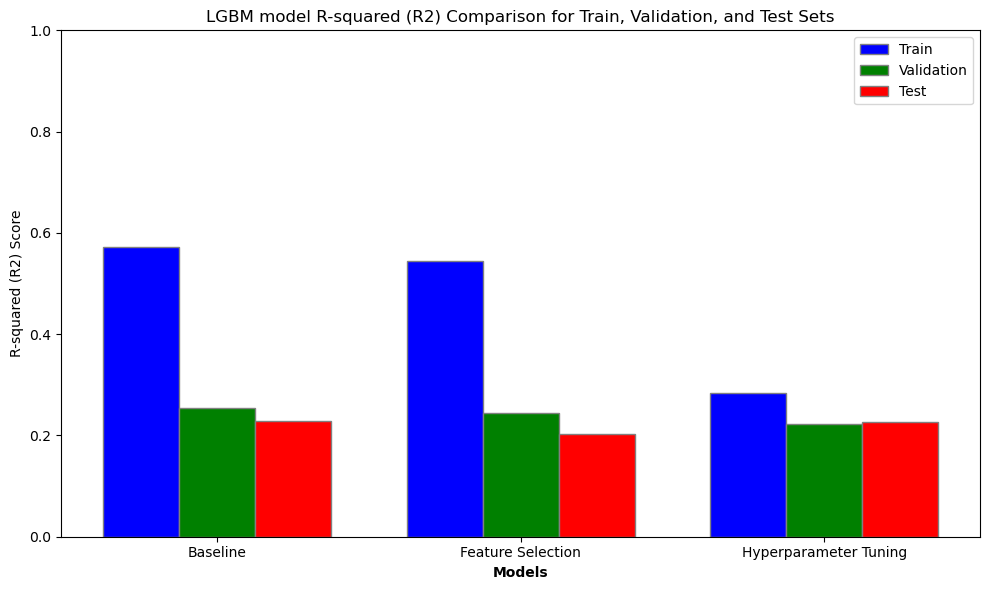

In [104]:
# Combine R2 scores for all three models
train_r2_scores = [baseline_train_r2, feature_train_r2, tuned_train_r2]
val_r2_scores = [baseline_val_r2, feature_val_r2, tuned_val_r2]
test_r2_scores = [baseline_test_r2, feature_test_r2, tuned_test_r2]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_r2_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_r2_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_r2_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_r2_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_r2_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('LGBM model R-squared (R2) Comparison for Train, Validation, and Test Sets')
plt.ylim(0, 1)  # Set y-axis limit to better visualize differences
plt.ylabel('R-squared (R2) Score')
plt.tight_layout()

plt.show()

#### MAE

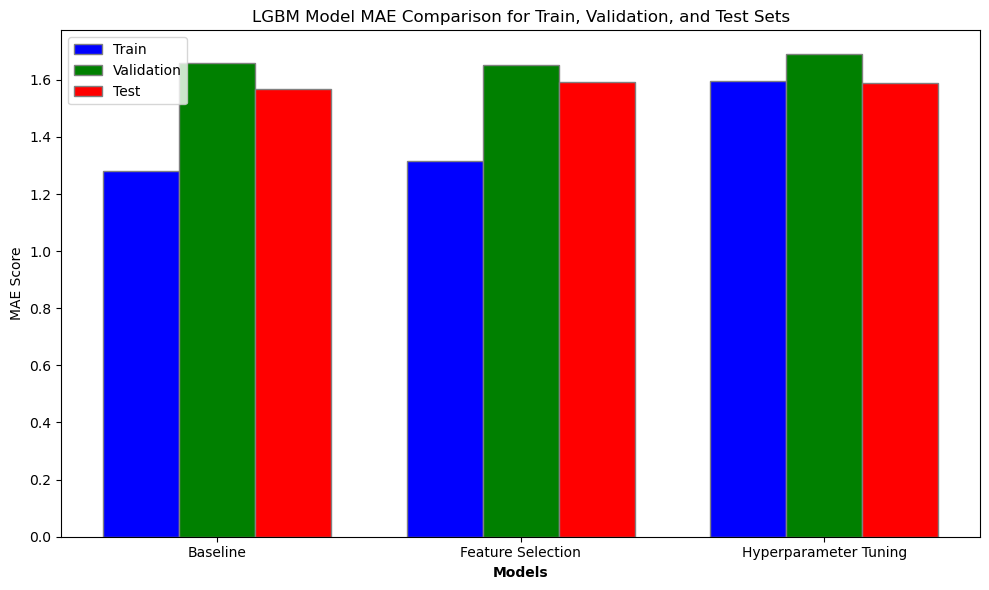

In [105]:
# Combine MAE scores for all three models
train_mae_scores = [baseline_train_mae, feature_train_mae, tuned_train_mae]
val_mae_scores = [baseline_val_mae, feature_val_mae, tuned_val_mae]
test_mae_scores = [baseline_test_mae, feature_test_mae, tuned_test_mae]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_mae_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_mae_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_mae_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_mae_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_mae_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('LGBM Model MAE Comparison for Train, Validation, and Test Sets')
plt.ylabel('MAE Score')
plt.tight_layout()

plt.show()

#### MSE

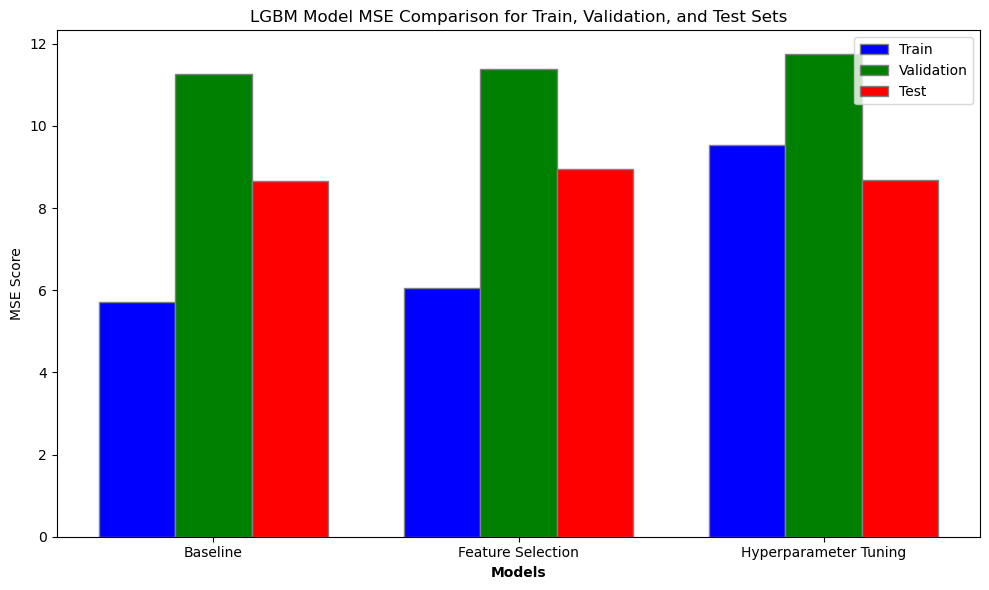

In [106]:
# Combine MSE scores for all three models
train_mse_scores = [baseline_train_mse, feature_train_mse, tuned_train_mse]
val_mse_scores = [baseline_val_mse, feature_val_mse, tuned_val_mse]
test_mse_scores = [baseline_test_mse, feature_test_mse, tuned_test_mse]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_mse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_mse_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_mse_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_mse_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_r2_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('LGBM Model MSE Comparison for Train, Validation, and Test Sets')
plt.ylabel('MSE Score')
plt.tight_layout()

plt.show()

#### RMSE

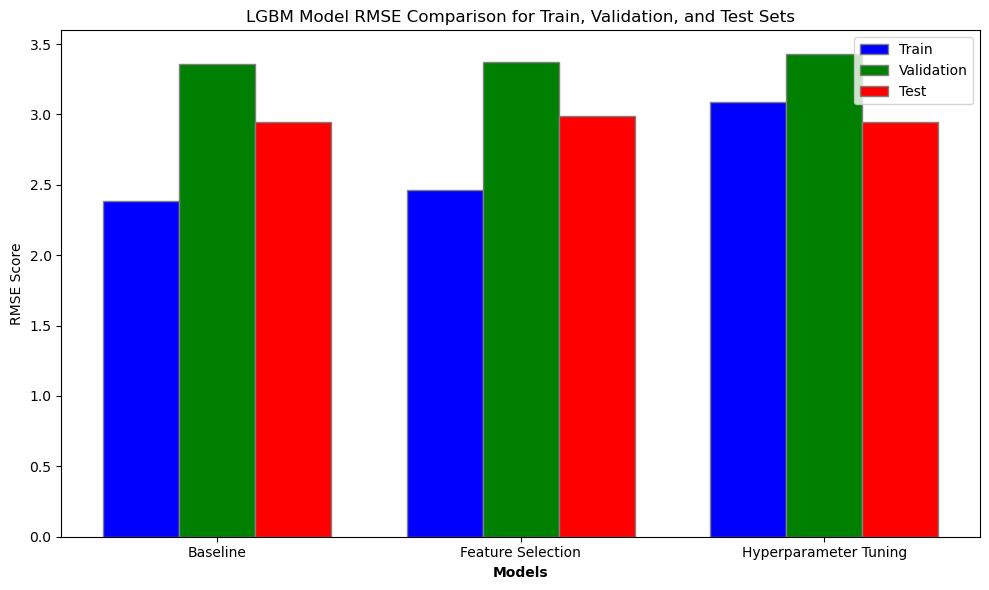

In [107]:
# Combine RMSE scores for all three models
train_rmse_scores = [baseline_train_rmse, feature_train_rmse, tuned_train_rmse]
val_rmse_scores = [baseline_val_rmse, feature_val_rmse, tuned_val_rmse]
test_rmse_scores = [baseline_test_rmse, feature_test_rmse, tuned_test_rmse]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_rmse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_rmse_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_rmse_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_rmse_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_rmse_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('LGBM Model RMSE Comparison for Train, Validation, and Test Sets')
plt.ylabel('RMSE Score')
plt.tight_layout()

plt.show()

### Summary

The Baseline LGBM Model demonstrates moderate performance on the training set, but its effectiveness diminishes when applied to unseen data, suggesting potential overfitting. Similarly, the Feature Model shows comparable results to the Baseline, with no significant improvement in predictive accuracy. However, the Tuned LGBM Model, despite its lower performance on the training set, exhibits better generalization and prediction accuracy on new data compared to the Baseline and Feature models. Thus, the Tuned LGBM Model emerges as the most promising choice among the evaluated models, offering improved generalization and predictive capabilities on unseen data

## XGBoost 

XGBoost is known for its high performance and efficiency. It is optimized for speed, model performance and can help with imbalanced data.
XGBoost supports various loss functions, making it flexible for different types of regression tasks. It can handle both linear and non-linear relationships between features and the target variable.
Overall, XGBoost is a powerful and versatile algorithm that is well-suited for regression problems, offering high performance, flexibility, and robustness.

### XGBoost Baseline Model

In [108]:
from xgboost import XGBRegressor  # Import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df.drop(columns=["RR", "DATE"])
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training - Instantiate and fit XGBRegressor
model3 = XGBRegressor()  # Instantiate XGBRegressor
model3.fit(X_train, y_train)  # Fit the model

# Step 4: Model Evaluation
y_pred_train = model3.predict(X_train)
y_pred_val = model3.predict(X_val)
y_pred_test = model3.predict(X_test)

Xbaseline_train_mae = mean_absolute_error(y_train, y_pred_train)
Xbaseline_val_mae = mean_absolute_error(y_val, y_pred_val)
Xbaseline_test_mae = mean_absolute_error(y_test, y_pred_test)

Xbaseline_train_mse = mean_squared_error(y_train, y_pred_train)
Xbaseline_val_mse = mean_squared_error(y_val, y_pred_val)
Xbaseline_test_mse = mean_squared_error(y_test, y_pred_test)

Xbaseline_train_r2 = r2_score(y_train, y_pred_train)
Xbaseline_val_r2 = r2_score(y_val, y_pred_val)
Xbaseline_test_r2 = r2_score(y_test, y_pred_test)

Xbaseline_train_rmse = np.sqrt(Xbaseline_train_mse)  # Update variable names for MSE and RMSE
Xbaseline_val_rmse = np.sqrt(Xbaseline_val_mse)
Xbaseline_test_rmse = np.sqrt(Xbaseline_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']  # Update metrics list
Xbaseline_train_scores = [Xbaseline_train_r2, Xbaseline_train_mae, Xbaseline_train_mse, Xbaseline_train_rmse]  # Update score lists
Xbaseline_val_scores = [Xbaseline_val_r2, Xbaseline_val_mae, Xbaseline_val_mse, Xbaseline_val_rmse]
Xbaseline_test_scores = [Xbaseline_test_r2, Xbaseline_test_mae, Xbaseline_test_mse, Xbaseline_test_rmse]

# Print Results
print("Metrics Used:", metrics)
print("Train Scores:", Xbaseline_train_scores)
print("Validation Scores:", Xbaseline_val_scores)
print("Test Scores:", Xbaseline_test_scores)

Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.8564658856839247, 0.8444750163666689, 1.912956631859295, 1.3830967543376331]
Validation Scores: [0.16997878657828602, 1.848351025929242, 12.523376802337182, 3.5388383408029793]
Test Scores: [0.14026724752280773, 1.7144471628565723, 9.650304181485312, 3.1064938727583726]


### PolynomialFeatures transformer from scikit-learn to generate polynomial and interaction features

Lower R2 values when using fewer features selected based on SHAP values, it could be due to several reasons. During the feature selection, the model might be losing important information to ensure accurate predictions.

Therefore we can try out another feature engineering technique:

Polynomial Features - Generate polynomial features by raising existing features to different powers. This allows the model to capture non-linear relationships between features and the target variable.

In [109]:
from sklearn.preprocessing import PolynomialFeatures

# Select the features for which you want to create interaction terms
selected_features = ['CC', 'HU', 'QQ', 'TX', 'TN', 'TG', 'PP', 'SD', 'SS', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'DAYOFYEAR', 'sin_dayofyear', 'cos_dayofyear']

# Extract the selected features from your DataFrame lw_df
X_selected = lw_df[selected_features]

# Create an instance of PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected features to generate polynomial and interaction features
X_poly = poly_features.fit_transform(X_selected)

# Convert the transformed features into a DataFrame for further analysis
X_poly_df = pd.DataFrame(X_poly)

# Concatenate the polynomial features DataFrame with the original DataFrame lw_df
lw_df_poly = pd.concat([lw_df, X_poly_df], axis=1)

In [110]:
lw_df_poly

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD  ...  \
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  ...   
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  ...   
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  ...   
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  ...   
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  ...   
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...   
14847 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  ...   
14848 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  ...   
14849 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  ...   
14850 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  ...   
14851 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  ...   

        142     143       144       145       146       147       148  \
0       0.0     0.0  0.000000  0.000000       1.0  0.014446  0.009275   
1       1.0     2.0  0.015610 -0.007144       4.0  0.031220 -0.014288   
2       4.0     6.0  0.004845 -0.033991       9.0  0.007268 -0.050986   
3       9.0    12.0 -0.038976 -0.033664      16.0 -0.051969 -0.044885   
4      16.0    20.0 -0.065848  0.019479      25.0 -0.082310  0.024348   
...     ...     ...       ...       ...       ...       ...       ...   
14847   1.0   361.0  0.004796 -0.016484  130321.0  1.731456 -5.950563   
14848   4.0   724.0 -0.022558 -0.025884  131044.0 -4.082995 -4.685015   
14849   9.0  1089.0 -0.050953  0.007495  131769.0 -6.165340  0.906896   
14850  16.0  1456.0 -0.028298  0.062567  132496.0 -2.575095  5.693595   
14851  25.0  1825.0  0.046699  0.072021  133225.0  3.409005  5.257535   

            149       150       151  
0      0.000209  0.000134  0.000086  
1      0.000244 -0.000112  0.000051  
2      0.000006 -0.000041  0.000289  
3      0.000169  0.000146  0.000126  
4      0.000271 -0.000080  0.000024  
...         ...       ...       ...  
14847  0.000023 -0.000079  0.000272  
14848  0.000127  0.000146  0.000167  
14849  0.000288 -0.000042  0.000006  
14850  0.000050 -0.000111  0.000245  
14851  0.000087  0.000135  0.000207  

[14852 rows x 170 columns]

### Now let's try doing the SHAP 

This will help determine which features are most important for feature selection

[19:26:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


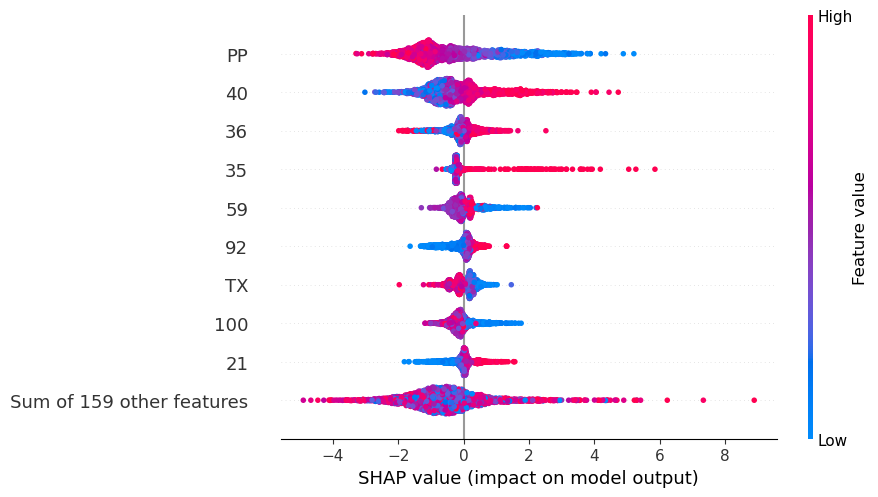

In [111]:
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = lw_df_poly.drop(columns=["RR", "DATE"])
y = lw_df_poly["RR"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., XGBoost) on the training data
model = XGBRegressor()
model.fit(X_train, y_train)

# Initialize the SHAP explainer with the trained model and the training data
explainer = shap.Explainer(model, X_train)

# Plot the SHAP beeswarm plot
shap.plots.beeswarm(explainer(X_test), show=False)

# Display the plot
plt.show()

Now let's redo the XGBBooster regressor with the top 9 features

Let's rename them

In [113]:
# Get the integer indices of the columns you want to rename
column_indices = [40, 36, 35, 59, 92, 100, 21]

# Define the new column names
new_column_names = ['PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5', 'PFeature6', 'PFeature7']

# Rename the columns using the integer indices and new column names
for i, new_name in zip(column_indices, new_column_names):
    lw_df_poly.rename({lw_df_poly.columns[i]: new_name}, inplace=True, axis=1)

# Verify the renamed columns
print("Renamed columns:", lw_df_poly.columns[column_indices])

Renamed columns: Index(['PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5',
       'PFeature6', 'PFeature7'],
      dtype='object')


In [114]:
list(zip(column_indices, new_column_names))

[(40, 'PFeature1'),
 (36, 'PFeature2'),
 (35, 'PFeature3'),
 (59, 'PFeature4'),
 (92, 'PFeature5'),
 (100, 'PFeature6'),
 (21, 'PFeature7')]

Check to see that none of the desired columns are missing.

In [115]:
# Get the column names of lw_df_poly
column_names = lw_df_poly.columns

# Check if the desired column names exist in the DataFrame
desired_columns = ['PP', 'PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5', 'TX', 'PFeature6', 'PFeature7']
missing_columns = [col for col in desired_columns if col not in column_names]

# Print the missing columns, if any
print("Missing columns:", missing_columns)

Missing columns: []


### Feature XGBooster model

In [116]:
from xgboost import XGBRegressor  # Import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df_poly[["PP",'PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5', "TX", 'PFeature6', 'PFeature7']]
y = lw_df_poly["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training - Instantiate and fit XGBRegressor
model4 = XGBRegressor()  # Instantiate XGBRegressor
model4.fit(X_train, y_train)  # Fit the model

# Step 4: Model Evaluation
y_pred_train = model4.predict(X_train)
y_pred_val = model4.predict(X_val)
y_pred_test = model4.predict(X_test)

Xfeature_train_mae = mean_absolute_error(y_train, y_pred_train)
Xfeature_val_mae = mean_absolute_error(y_val, y_pred_val)
Xfeature_test_mae = mean_absolute_error(y_test, y_pred_test)

Xfeature_train_mse = mean_squared_error(y_train, y_pred_train)
Xfeature_val_mse = mean_squared_error(y_val, y_pred_val)
Xfeature_test_mse = mean_squared_error(y_test, y_pred_test)

Xfeature_train_r2 = r2_score(y_train, y_pred_train)
Xfeature_val_r2 = r2_score(y_val, y_pred_val)
Xfeature_test_r2 = r2_score(y_test, y_pred_test)

Xfeature_train_rmse = np.sqrt(Xfeature_train_mse)  # Update variable names for MSE and RMSE
Xfeature_val_rmse = np.sqrt(Xfeature_val_mse)
Xfeature_test_rmse = np.sqrt(Xfeature_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']  # Update metrics list
Xfeature_train_scores = [Xfeature_train_r2, Xfeature_train_mae, Xfeature_train_mse, Xfeature_train_rmse]  # Update score lists
Xfeature_val_scores = [Xfeature_val_r2, Xfeature_val_mae, Xfeature_val_mse, Xfeature_val_rmse]
Xfeature_test_scores = [Xfeature_test_r2, Xfeature_test_mae, Xfeature_test_mse, Xfeature_test_rmse]

# Print Results
print("Metrics Used:", metrics)
print("Train Scores:", Xfeature_train_scores)
print("Validation Scores:", Xfeature_val_scores)
print("Test Scores:", Xfeature_test_scores)

Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.8135501704389678, 0.9320105607781494, 2.4849175380174127, 1.5763621214738106]
Validation Scores: [0.17101767354408226, 1.8115201542251202, 12.50770205485203, 3.536622973240437]
Test Scores: [0.09933421368876183, 1.7502704061917658, 10.109768156111604, 3.17958616113978]


As with the LGBM, let's perform a grid search to get the best hyperparameters.

In [117]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df_poly[["PP",'PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5', "TX", 'PFeature6', 'PFeature7']]
y = lw_df_poly["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [0, 0.1, 1.0]
}

model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Step 4: Model Training with Best Parameters
best_params = grid_result.best_params_
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Print Results
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.6}


Now with the given parameters, let's run the model again.

## Tuned XGBooster Model

In [118]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df_poly[["PP",'PFeature1', 'PFeature2', 'PFeature3', 'PFeature4', 'PFeature5', "TX", 'PFeature6', 'PFeature7']]
y = lw_df_poly["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training - Instantiate and fit XGBRegressor with regularization
model4 = XGBRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1.0, subsample=0.6)  # Apply regularization parameters
model4.fit(X_train, y_train)  # Fit the model

# Step 4: Model Evaluation
y_pred_train = model4.predict(X_train)
y_pred_val = model4.predict(X_val)
y_pred_test = model4.predict(X_test)

# Calculate evaluation metrics
Xtuned_train_mae = mean_absolute_error(y_train, y_pred_train)
Xtuned_val_mae = mean_absolute_error(y_val, y_pred_val)
Xtuned_test_mae = mean_absolute_error(y_test, y_pred_test)

Xtuned_train_mse = mean_squared_error(y_train, y_pred_train)
Xtuned_val_mse = mean_squared_error(y_val, y_pred_val)
Xtuned_test_mse = mean_squared_error(y_test, y_pred_test)

Xtuned_train_r2 = r2_score(y_train, y_pred_train)
Xtuned_val_r2 = r2_score(y_val, y_pred_val)
Xtuned_test_r2 = r2_score(y_test, y_pred_test)

Xtuned_train_rmse = np.sqrt(Xtuned_train_mse)
Xtuned_val_rmse = np.sqrt(Xtuned_val_mse)
Xtuned_test_rmse = np.sqrt(Xtuned_test_mse)

# Results obtained from model evaluation
metrics = ['R-squared', 'MAE', 'MSE', 'RMSE']
Xtuned_train_scores = [Xtuned_train_r2, Xtuned_train_mae, Xtuned_train_mse, Xtuned_train_rmse]
Xtuned_val_scores = [Xtuned_val_r2, Xtuned_val_mae, Xtuned_val_mse, Xtuned_val_rmse]
Xtuned_test_scores = [Xtuned_test_r2, Xtuned_test_mae, Xtuned_test_mse, Xtuned_test_rmse]

# Print Results
print("Metrics Used:", metrics)
print("Train Scores:", Xtuned_train_scores)
print("Validation Scores:", Xtuned_val_scores)
print("Test Scores:", Xtuned_test_scores)

Metrics Used: ['R-squared', 'MAE', 'MSE', 'RMSE']
Train Scores: [0.34753722844187906, 1.5749629012046966, 8.695723604389265, 2.9488512346995845]
Validation Scores: [0.2289876976333145, 1.6986007090926374, 11.63304916264798, 3.410725606472614]
Test Scores: [0.22402648385032087, 1.6186637750329154, 8.710125845554275, 2.9512922331674094]


### Comparing metrics for XGBooster Models

In [119]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [Xbaseline_train_scores[i] for i in range(len(metrics))]
val_scores = [Xbaseline_val_scores[i] for i in range(len(metrics))]
test_scores = [Xbaseline_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Baseline XGBooster Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Baseline XGBooster Model:
Metric     Train      Validation   Test    
R2         0.8565     0.1700       0.1403  
MAE        0.8445     1.8484       1.7144  
MSE        1.9130     12.5234      9.6503  
RMSE       1.3831     3.5388       3.1065  


In [120]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [Xfeature_train_scores[i] for i in range(len(metrics))]
val_scores = [Xfeature_val_scores[i] for i in range(len(metrics))]
test_scores = [Xfeature_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Feature XGBooster Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Feature XGBooster Model:
Metric     Train      Validation   Test    
R2         0.8136     0.1710       0.0993  
MAE        0.9320     1.8115       1.7503  
MSE        2.4849     12.5077      10.1098 
RMSE       1.5764     3.5366       3.1796  


In [121]:
# Define the metrics and their corresponding scores
metrics = ['R2', 'MAE', 'MSE', 'RMSE']
train_scores = [Xtuned_train_scores[i] for i in range(len(metrics))]
val_scores = [Xtuned_val_scores[i] for i in range(len(metrics))]
test_scores = [Xtuned_test_scores[i] for i in range(len(metrics))]

# Print the results
print("Model Evaluation Metrics of Tuned XGBooster Model:")
print(f"{'Metric':<10} {'Train':<10} {'Validation':<12} {'Test':<8}")
for i, metric in enumerate(metrics):
    print(f"{metric:<10} {train_scores[i]:<10.4f} {val_scores[i]:<12.4f} {test_scores[i]:<8.4f}")

Model Evaluation Metrics of Tuned XGBooster Model:
Metric     Train      Validation   Test    
R2         0.3475     0.2290       0.2240  
MAE        1.5750     1.6986       1.6187  
MSE        8.6957     11.6330      8.7101  
RMSE       2.9489     3.4107       2.9513  


### Visualizing Metrics for XGBooster models

#### R2

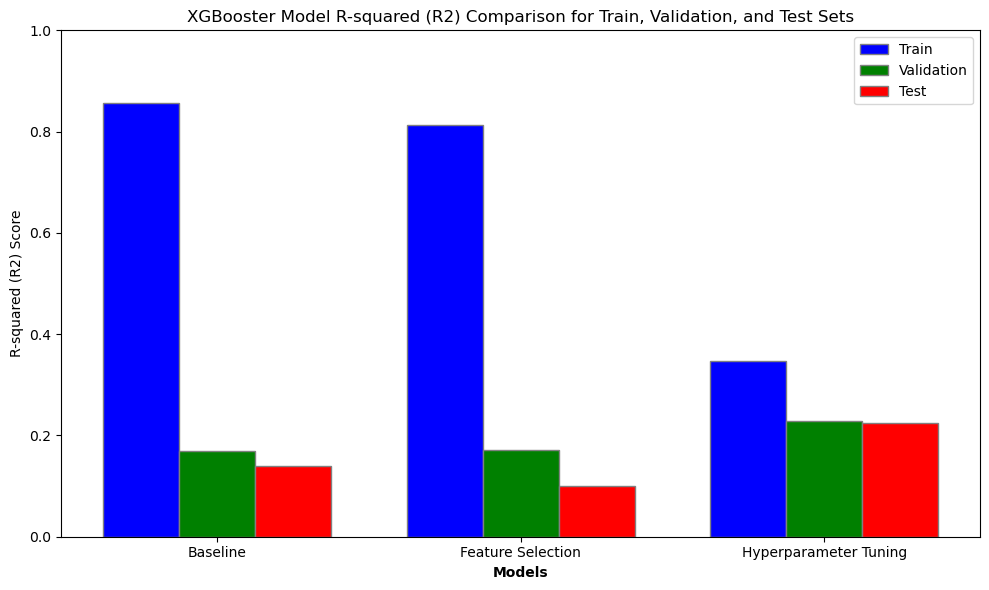

In [122]:
# Combine R2 scores for all three models
train_r2_scores = [Xbaseline_train_r2, Xfeature_train_r2, Xtuned_train_r2]
val_r2_scores = [Xbaseline_val_r2, Xfeature_val_r2, Xtuned_val_r2]
test_r2_scores = [Xbaseline_test_r2, Xfeature_test_r2, Xtuned_test_r2]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_r2_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_r2_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_r2_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_r2_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_r2_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('XGBooster Model R-squared (R2) Comparison for Train, Validation, and Test Sets')
plt.ylim(0, 1)  # Set y-axis limit to better visualize differences
plt.ylabel('R-squared (R2) Score')
plt.tight_layout()

plt.show()

### MAE

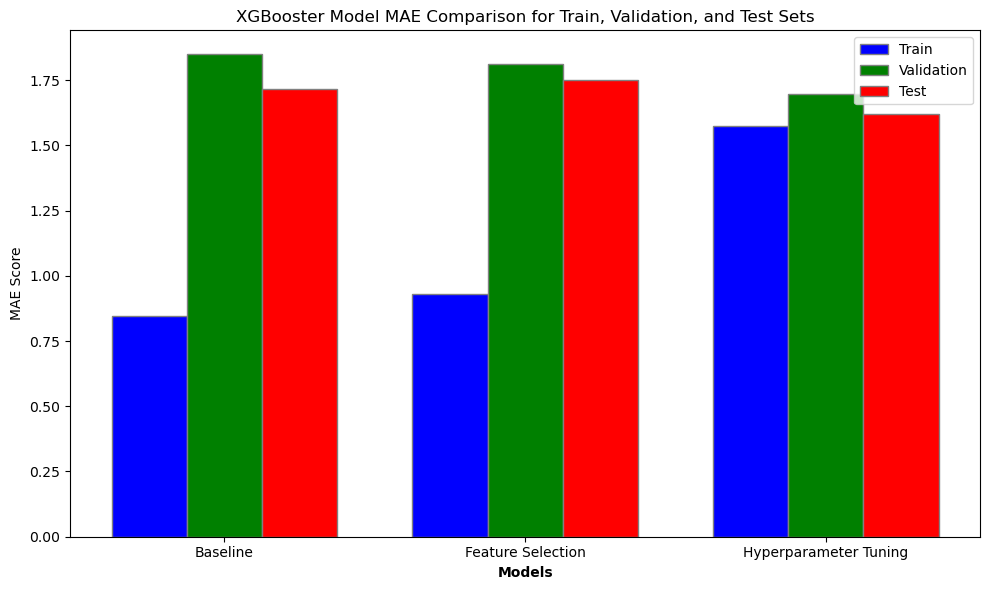

In [123]:
# Combine MAE scores for all three models
train_mae_scores = [Xbaseline_train_mae, Xfeature_train_mae, Xtuned_train_mae]
val_mae_scores = [Xbaseline_val_mae, Xfeature_val_mae, Xtuned_val_mae]
test_mae_scores = [Xbaseline_test_mae, Xfeature_test_mae, Xtuned_test_mae]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_mae_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_mae_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_mae_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_mae_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_mae_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('XGBooster Model MAE Comparison for Train, Validation, and Test Sets')
plt.ylabel('MAE Score')
plt.tight_layout()

plt.show()

### MSE

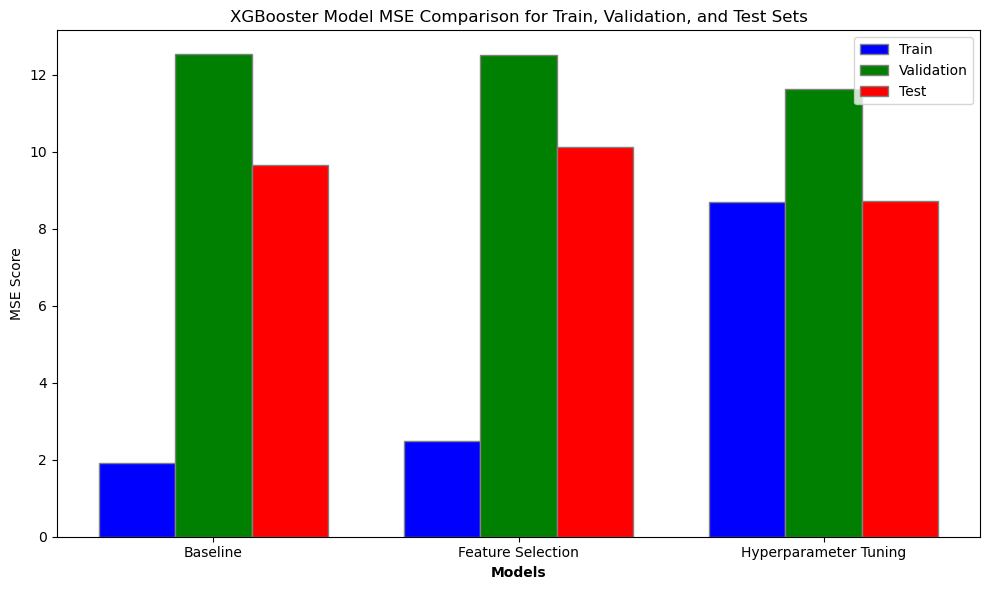

In [124]:
# Combine MSE scores for all three models
train_mse_scores = [Xbaseline_train_mse, Xfeature_train_mse, Xtuned_train_mse]
val_mse_scores = [Xbaseline_val_mse, Xfeature_val_mse, Xtuned_val_mse]
test_mse_scores = [Xbaseline_test_mse, Xfeature_test_mse, Xtuned_test_mse]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_mse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_mse_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_mse_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_mse_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_r2_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('XGBooster Model MSE Comparison for Train, Validation, and Test Sets')
plt.ylabel('MSE Score')
plt.tight_layout()

plt.show()

### RMSE

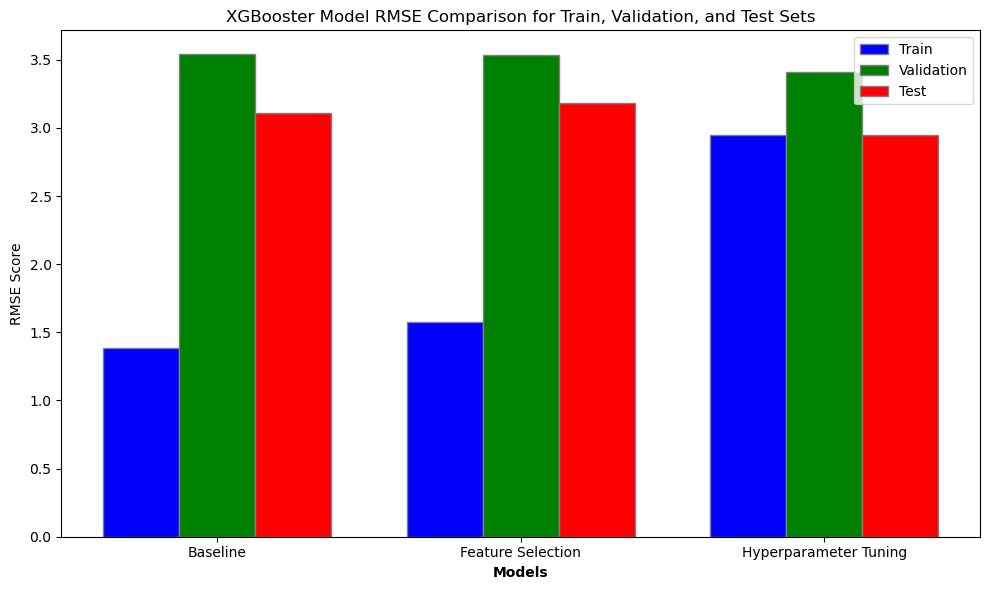

In [125]:
# Combine RMSE scores for all three models
train_rmse_scores = [Xbaseline_train_rmse, Xfeature_train_rmse, Xtuned_train_rmse]
val_rmse_scores = [Xbaseline_val_rmse, Xfeature_val_rmse, Xtuned_val_rmse]
test_rmse_scores = [Xbaseline_test_rmse, Xfeature_test_rmse, Xtuned_test_rmse]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(train_rmse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_rmse_scores, color='b', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, val_rmse_scores, color='g', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r3, test_rmse_scores, color='r', width=bar_width, edgecolor='grey', label='Test')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(train_rmse_scores))], ['Baseline', 'Feature Selection', 'Hyperparameter Tuning'])

# Create legend & Show graphic
plt.legend()
plt.title('XGBooster Model RMSE Comparison for Train, Validation, and Test Sets')
plt.ylabel('RMSE Score')
plt.tight_layout()

plt.show()

#### Summary of Results

The Baseline XGBooster Model performs admirably on the training data but appears to struggle when applied to unseen data, suggesting potential overfitting. While the Feature XGBooster Model shows slight enhancements over the Baseline, it doesn't significantly improve prediction accuracy. However, the Tuned XGBooster Model, despite its comparatively lower performance on the training set, exhibits superior generalization and predictive capabilities on new data. Consequently, the Tuned XGBooster Model emerges as the most favorable choice among the three models assessed.

## 5. Conclusion

If we consider both XGBoost and LGBM models, the Tuned XGBooster Model and the Tuned LGBM Model emerge as the top performers. In determining which to use, one must consider the tradeoffs. However, if we were to consider based on just the performance metrics alone, the Tuned LGBM Model does the best. It has an overall better R2 and lower errors. Additionally, in terms of usability, it can be a preferred choice as they are computationally more effecient as well as fast, making them the ideal model for larger datasets. They'd therefore be the most economically feasible between the two. 

Despite efforts in both time series forecasting and the use of Boost regressor models, low prediction performances were concluded. The Tuned XGBooster Model had a test R2 of 0.224 while the Tuned LGBM Model did marginally better with a test R2 of 0.2256. The Tuned XGBooster Model could possibly be improved by identifying more top features of SHAP and then running models with the necessary hyperparameters. 
Regarding the timeseries forecasts, models equipped for multivariate data should be used such as VARMA. Another avenue could be the usage of deep learning models such as DeepAR. However, further investigation into optimization would be key in attaining better forecasts. 

#### Further Steps

Some other factors to consider as well would be to incorporte other relevant information. This includes but is not limited to:

- Prevailing winds (speed, direction)
- Topography (eg: elevation data, slope) and Geographical location
- Pollution
- Proximity to water bodies (eg: River Thames)

Including such features would enhance the capabilities of models in predicting precipitaion. Further steps could also be made with SMEs(subject matter experts). This would be with regards to clarifying any missing values as well as the accuracy of the instrumentation in determining the validity of the values recorded. 